In [1]:
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd
import re
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.losses import BinaryCrossentropy
import pandas as pd
import sklearn

invalid escape sequence \s
invalid escape sequence \:
invalid escape sequence \:


In [2]:
from keras_nlp.layers import PositionEmbedding

Using TensorFlow backend


# Reading Data

In [3]:
#df=pd.read_csv("/NAMESCREENING_1/X71uZTip/Processed_Names.csv")
import os
# Recipe inputs
folder_path = dataiku.Folder('Roumya_ns_stuff').get_path()


#folder_path = dataiku.Folder("Name Screening notebooks").get_path()  #/* FuShmlsH is the Folder ID */
path_of_csv = os.path.join(folder_path, "Final_training_dataset_2_data_enh.csv") #/* dataset_01.csv is one of the files in this folder */
df=pd.read_csv(path_of_csv)
# df=pd.read_csv("Processed_Names.csv")


Columns (11,27,35,49,53,54,55,60,70,82,83,84,85,86,91,92,109,110,111,130) have mixed types.Specify dtype option on import or set low_memory=False.


### Loading Test data for Nov & Dec

In [4]:
#df=pd.read_csv("/NAMESCREENING_1/X71uZTip/Processed_Names.csv")
import os
# Recipe inputs
#folder_path = dataiku.Folder('Roumya_ns_stuff').get_path()


folder_path = dataiku.Folder("Name Screening notebooks").get_path()  #/* FuShmlsH is the Folder ID */
path_of_csv = os.path.join(folder_path, "enhanced_data_nov_test_results_with_predsid.csv") #/* dataset_01.csv is one of the files in this folder */
test1 =pd.read_csv(path_of_csv)
# df=pd.read_csv("Processed_Names.csv")


In [5]:
folder_path = dataiku.Folder("Roumya_ns_stuff").get_path()  #/* FuShmlsH is the Folder ID */
path_of_csv = os.path.join(folder_path, "enhanced_data_dec_test_results_with_predsid.csv") #/* dataset_01.csv is one of the files in this folder */
test2 =pd.read_csv(path_of_csv)

In [6]:
test1 = test1[['ALL_ALIAS_NAMES', 'ALL_PARTY_NAMES', 'ALL_WL_NAMES', 'V_COMMENTS', 'V_RESOLUTION', 'N_MATCH_SCORE']]
test2 = test2[['ALL_ALIAS_NAMES', 'ALL_PARTY_NAMES', 'ALL_WL_NAMES', 'V_COMMENTS', 'V_RESOLUTION', 'N_MATCH_SCORE']]

In [7]:
test1.shape

(39885, 6)

In [8]:
test2.shape

(22385, 6)

In [9]:
# full_test_data = pd.concat([test1, test2]) # concatenating the data for nov and dec together to get the test data

In [10]:
# full_test_data.shape # complete test data 

In [14]:
df.shape 

(810445, 150)

In [15]:
for col in df.columns:
    print(col)

Unnamed: 0.1
N_PARTY_WATCHLIST_MATCH_ID
V_UCIF_ID
V_SCREENING_ID
N_WATCHLIST_PROFILE_ID
N_MATCH_SCORE
V_WATCHLIST_PARTY_NAME
V_INFO_SOURCE
V_WL_STATUS_CODE
D_DT_OF_SCREENING
V_COMMENTS
N_WORKFLOW_ID
F_RECENT_MATCH
V_RESOLUTION
V_REASON
F_DELTA_MATCH
D_CREATED_DTM
V_CREATED_BY
D_UPDATED_DTM
V_UPDATED_BY
N_SCREENING_VERSION
V_COUNTRY_OF_ONBOARDING
V_UCIF_ID_1
V_PARTY_CLASS
V_PARTY_TYPE
V_REGD_PARTY_NAME
V_ALIAS_NAME
V_GENDER
V_PARTY_FIRST_NAME
V_PARTY_MID_NAME
V_PARTY_LST_NAME
D_INCORPORATION_DATE
V_COUNTRY_OF_INCORP
V_COUNTRY_OF_BIRTH
V_PREVIOUS_NAME_IMMEDIATE
V_PREVIOUS_NAME_1
V_PREVIOUS_NAME_2
D_DOB
D_DECEASED_DATE
F_DECEASED_FLAG
V_COUNTRY_OF_BIRTH_1
V_FATHERS_NAME
V_MOTHERS_NAME
V_CREATED_BY_1
D_CREATED_DTM_1
V_UPDATED_BY_1
D_UPDATED_DTM_1
F_DELETE_FLAG
F_UPDATE_FLAG
V_LEGAL_STRUCTURE
F_PEP_STATUS
F_FMLY_PEP_STATUS
V_PEP_BIOGRAPHY
V_PEP_RELATIONSHIP
V_PEP_NAME
V_UCIF_ID_1_1
V_COUNTRY_OF_ONBOARDING_1
V_PARTY_GROUP
V_CITIZENSHIP
V_DUAL_CITIZENSHIP
V_OCC_CODE
V_COUNTRY_PERM_RES
V_SCREE

In [13]:
try :
    df.drop("Unnamed: 0",axis=1,inplace=True)
except:
    df
df

,Unnamed: 0.1,N_PARTY_WATCHLIST_MATCH_ID,V_UCIF_ID,V_SCREENING_ID,N_WATCHLIST_PROFILE_ID,N_MATCH_SCORE,V_WATCHLIST_PARTY_NAME,V_INFO_SOURCE,V_WL_STATUS_CODE,D_DT_OF_SCREENING,V_COMMENTS,N_WORKFLOW_ID,F_RECENT_MATCH,V_RESOLUTION,V_REASON,F_DELTA_MATCH,D_CREATED_DTM,V_CREATED_BY,D_UPDATED_DTM,V_UPDATED_BY,N_SCREENING_VERSION,V_COUNTRY_OF_ONBOARDING,V_UCIF_ID_1,V_PARTY_CLASS,V_PARTY_TYPE,V_REGD_PARTY_NAME,V_ALIAS_NAME,V_GENDER,V_PARTY_FIRST_NAME,V_PARTY_MID_NAME,V_PARTY_LST_NAME,D_INCORPORATION_DATE,V_COUNTRY_OF_INCORP,V_COUNTRY_OF_BIRTH,V_PREVIOUS_NAME_IMMEDIATE,V_PREVIOUS_NAME_1,V_PREVIOUS_NAME_2,D_DOB,D_DECEASED_DATE,F_DECEASED_FLAG,V_COUNTRY_OF_BIRTH_1,V_FATHERS_NAME,V_MOTHERS_NAME,V_CREATED_BY_1,D_CREATED_DTM_1,V_UPDATED_BY_1,D_UPDATED_DTM_1,F_DELETE_FLAG,F_UPDATE_FLAG,V_LEGAL_STRUCTURE,F_PEP_STATUS,F_FMLY_PEP_STATUS,V_PEP_BIOGRAPHY,V_PEP_RELATIONSHIP,V_PEP_NAME,V_UCIF_ID_1_1,V_COUNTRY_OF_ONBOARDING_1,V_PARTY_GROUP,V_CITIZENSHIP,V_DUAL_CITIZENSHIP,V_OCC_CODE,V_COUNTRY_PERM_RES,V_SCREENING_STATUS,V_SCREENING_ID_1,V_CREATED_BY_PL,D_CREATED_DTM_PL,V_UPDATED_BY_PL,D_UPDATED_DTM_1_1,F_DELETE_FLAG_1,F_UPDATE_FLAG_1,N_SCREENING_VERSION_1,V_EMPLOYER_NAME,D_LAST_SCREENING_DATE,V_RACE,V_PARTY_CLASS_LEGACY,V_TITLE,V_RESIDENT_STATUS,V_UCIF_ID_2,AGG_UNQ_DOC_ID,AGG_V_ID_TYPE,V_PRIM_PTY_UCIF_ID,V_SEC_PTY_UCIF_ID,V_RELATION_TYPE_CD,N_NUMBER_OF_SHARES,N_SHAREHOLDING_PERCENT,V_SEC_PARTY_NAME,N_WATCHLIST_PROFILE_ID_1,V_WATCHLIST_PROFILE_UID,V_PROFILE_TYPE,V_PROFILE_NAME,V_ALIASES,V_TITLE_1,V_DOB,V_DOI,V_NATIONALITY,V_COI,V_IDENTIFICATION_NO,V_IC_NO,V_PLACE_OF_BIRTH,V_GENDER_WL,V_PEP_POSITION,V_BIOGRAPHY,V_INFO_SOURCE_1,V_REMARK,V_WL_STATUS_CODE_1,V_STATUS,D_CREATED_DTM_2,D_UPDATED_DTM_2,V_CATEGORY,V_SUB_CATEGORY,V_LOCATION_DETAILS,V_AGE,V_AGE_AS_OF_DATE,D_DOB_2,V_CUST_DOB,V_DOB_2,V_WATCHLIST_DOB_2,FINAL_WATCHLIST_DOB,DOB_MATCH,DOB_MATCH_1,DOB_MATCH_2,XYZ,XYZ_2,DOB_MATCH_3,DOB_MATCH_4,FINAL_DOB_MATCH,NER_V_AGE,NER_V_AGE_AS_OF_DATE,NER_V_DOB,NER_V_IDENTIFICATION_NO,NER_V_PROFILE_NAME,NER_V_PROFILE_NAME.1,NER_WATCHLIST_DOB,NER_V_DOB_2,NER_DOB_MATCH_1,NER_DOB_MATCH_2,NER_DOB_MATCH_3,ID_score,al_wl_ids,cust_id_all_sp_accom,trans_agg_v_id_type,score1,ALL_ALIAS_NAMES,ALL_PARTY_NAMES,ALL_WL_NAMES,PARTY_NAMES,WL_NAMES,SIAMESE_MATCH_SCORE,Final_Nysiis_bisim_score,V_PREDICTION
0,0,5638786,59573845,14125572,14168047,100.0,Ahmed ALI,ANEWS,76,2021-06-12 00:00:00,Mismatch Year of Birth (YOB). Customer's YOB i...,NaN,N,0,PI,N,2021-06-12 01:12:43,2e4a1d58-f055-49b6-a0d7-8a18982d1751,2023-09-30,80006684,1,MYS,59573845,I,11000.0,AHMED ALI,NaN,M,AHMED,NaN,ALI,NaN,NaN,BGD,NaN,NaN,NaN,"['1995', '01', '20']",NaN,N,BGD,NaN,NaN,000AC54A,2020-02-24 10:48:31,00069059,2021-03-25 13:11:56.643,N,NaN,INDV,NaN,NaN,NaN,NaN,NaN,59573845,MYS,EXT,BGD,NaN,U002,MYS,NOHITS,14125572,000AC54A,2020-02-24 10:48:31,00152251,2023-10-19 18:33:34.043283,N,NaN,1,NaN,2021-11-29 00:00:00,OTH,502.0,MRR,NONR,59573845.0,['EE0199288'],['PASS'],NaN,NaN,NaN,NaN,NaN,NaN,14168047,5156225,I,Ahmed ALI,NaN,NaN,[[]],NaN,BANGLADESH,NaN,NaN,NaN,NaN,M,NaN,[BIOGRAPHY] Alleged member {General} of Al-Qa'...,ANEWS,ADVERSE MEDIA,76,A,2021-11-29 20:42:00.336159,NaN,NONCONVICTION TERROR,NaN,"~ Dhaka, Dhaka ~ BANGLADESH",57.0,2019.0,[],"[['1995', '01', '20']]",[[]],"[['1960', '1961', '1962', '1963', '1964']]","[['1960', '1961', '1962', '1963', '1964'], [],...",0,0.0,-1.0,NaN,NaN,-1.0,-1.0,0.0,[],[[]],[[]],NaN,[],[],[[]],[[]],-1.0,-1.0,-1.0,-1.0,NaN,['EE0199288'],['PASS'],either ID not present,"['', '', '', '', '', '', '', '', '', '', '', '...","[' AHMAD ALI', '', '', '']","['', '', '', '', '', '', ' AHMAD ALI']",AHMAD ALI,AHMAD ALI,8.834493e-01,1.000000,0
1,1,4605798,152561464,5284657,10287347,100.0,HARIYANTO,PEPEX,81,2022-08-25 00:00:00,"Mismatch Profile\nAccording to World Check, Wa...",NaN,N,0,SI,N,2022-08-25 21:36:04,94834baa-bab6-4066-ae99-c5326810da46,2023-09-30,136544,1,MYS,152561464,I,11000.0,HARIYANTO,NaN,M,HARIYANTO,NaN,NFN,NaN,NaN,IDN,NaN,NaN,NaN,"['1976', '06', '09']",NaN,N,IDN,NaN,NaN,0004057A,2018-12-

In [16]:
print(df["ALL_ALIAS_NAMES"].apply(lambda x : type(x)).unique())
print(df["ALL_PARTY_NAMES"].apply(lambda x: type(x)).unique())
print(df["ALL_WL_NAMES"].apply(lambda x: type(x)).unique())

print(test1["ALL_ALIAS_NAMES"].apply(lambda x : type(x)).unique())
print(test1["ALL_PARTY_NAMES"].apply(lambda x: type(x)).unique())
print(test1["ALL_WL_NAMES"].apply(lambda x: type(x)).unique())

print(test2["ALL_ALIAS_NAMES"].apply(lambda x : type(x)).unique())
print(test2["ALL_PARTY_NAMES"].apply(lambda x: type(x)).unique())
print(test2["ALL_WL_NAMES"].apply(lambda x: type(x)).unique())


[<class 'str'>]
[<class 'str'>]
[<class 'str'>]
[<class 'str'>]
[<class 'str'>]
[<class 'str'>]
[<class 'str'>]
[<class 'str'>]
[<class 'str'>]


In [17]:
df[["ALL_ALIAS_NAMES","ALL_PARTY_NAMES","ALL_WL_NAMES"]]

,ALL_ALIAS_NAMES,ALL_PARTY_NAMES,ALL_WL_NAMES
0,"['', '', '', '', '', '', '', '', '', '', '', '...","[' AHMAD ALI', '', '', '']","['', '', '', '', '', '', ' AHMAD ALI']"
1,"['', '', '', '', '', '', '', '', '', '', '', '...","['HARIYANTO', '', '', '']","['', '', '', '', '', '', 'HARIYANTO']"
2,"['', '', '', '', '', '', '', '', '', '', '', '...","['ZHANGA TING', '', '', '']","['', '', '', '', '', '', 'BING ZHANG']"
3,"['', '', '', '', '', '', '', '', '', '', '', '...","[' MOHD SADDAM HOSSAIN', '', '', '']","['', '', '', '', '', '', ' MOHD SADDAM HOSSAIN']"
4,"['', '', '', '', '', '', '', '', '', '', '', '...","['WANGA XIAODONG', '', '', '']","['WANG XIAO DONG', '', '', '', '', '', 'XIAODO..."
...,...,...,...
810440,"['', '', '', '', '', '', '', '', '', '', '', '...","['LIM CHEE KEONG', '', '', '']","['', '', '', '', '', '', 'SIM CHEE KEONG']"
810441,"['', '', '', '', '', '', '', '', '', '', '', '...","['MOHD ISHAM FAIZULEY BIN MD HARIS', '', '', '']","['', '', '', '', '', '', 'MOHD ISHAM FAIZULEY ..."
810442,"['', '', '', '', '', '', '', '', '', '', '', '...","['WONG SHU QI', '', '', '']","['', '', '', '', '', '', 'WONG SHU QI']"
810443,"['', '', '', '', '', '', '', '', '', '', '', '...","['MUHAMMAD AKMAL BIN YUSOF', '', '', '']","['', '', '', '', '', '', 'MUHAMMAD AKMAL BIN Y..."


In [18]:
# need to remove brackets & split based on comma as whole input in complete one string.
list_col=["ALL_ALIAS_NAMES","ALL_PARTY_NAMES","ALL_WL_NAMES"]
def str_gen(col_nam):
    print(col_nam)
    df[col_nam]=df[col_nam].apply(lambda x: x.lstrip("[").rstrip("]"))
    df[col_nam]=df[col_nam].apply(lambda x : re.split(",",x))
    df[col_nam]=df[col_nam].apply(lambda x: [i.strip("\"").strip(' \'') for i in x])

for i in list_col:
    str_gen(i)
    

ALL_ALIAS_NAMES
ALL_PARTY_NAMES
ALL_WL_NAMES


In [19]:
# for nov data    
def str_gen(col_nam):
    print(col_nam)
    test1[col_nam]=test1[col_nam].apply(lambda x: x.lstrip("[").rstrip("]"))
    test1[col_nam]=test1[col_nam].apply(lambda x : re.split(",",x))
    test1[col_nam]=test1[col_nam].apply(lambda x: [i.strip("\"").strip(' \'') for i in x])

for i in list_col:
    str_gen(i)
    

ALL_ALIAS_NAMES
ALL_PARTY_NAMES
ALL_WL_NAMES


In [20]:
# for dec data
def str_gen(col_nam):
    print(col_nam)
    test2[col_nam]=test2[col_nam].apply(lambda x: x.lstrip("[").rstrip("]"))
    test2[col_nam]=test2[col_nam].apply(lambda x : re.split(",",x))
    test2[col_nam]=test2[col_nam].apply(lambda x: [i.strip("\"").strip(' \'') for i in x])

for i in list_col:
    str_gen(i)

ALL_ALIAS_NAMES
ALL_PARTY_NAMES
ALL_WL_NAMES


In [21]:
df['ALL_ALIAS_NAMES']

0         [, , , , , , , , , , , , , , , ]
1         [, , , , , , , , , , , , , , , ]
2         [, , , , , , , , , , , , , , , ]
3         [, , , , , , , , , , , , , , , ]
4         [, , , , , , , , , , , , , , , ]
                        ...               
810440    [, , , , , , , , , , , , , , , ]
810441    [, , , , , , , , , , , , , , , ]
810442    [, , , , , , , , , , , , , , , ]
810443    [, , , , , , , , , , , , , , , ]
810444    [, , , , , , , , , , , , , , , ]
Name: ALL_ALIAS_NAMES, Length: 810445, dtype: object

In [22]:
df["ALL_PARTY_NAMES"].iloc[0:20]

0               [AHMAD ALI, , , ]
1               [HARIYANTO, , , ]
2             [ZHANGA TING, , , ]
3     [MOHD SADDAM HOSSAIN, , , ]
4          [WANGA XIAODONG, , , ]
5     [SUFIAN BIN MOHAMMAD, , , ]
6            [ZHANG LIHONG, , , ]
7               [RAVI KANT, , , ]
8       [MD SHAFIQUL ISLAM, , , ]
9            [MEHEDE HASAN, , , ]
10              [HARIYANTO, , , ]
11         [SHAFIQUL ISLAM, , , ]
12      [MD SHOFIQUL ISLAM, , , ]
13         [SHAFIQUL ISLAM, , , ]
14           [MEHEDI HASAN, , , ]
15         [ZHANG YINGHONG, , , ]
16      [ROSLI BIN IBRAHIM, , , ]
17           [MEHEDI HASAN, , , ]
18           [MEHEDI HASAN, , , ]
19       [MD DILLUR RAHMAN, , , ]
Name: ALL_PARTY_NAMES, dtype: object

In [23]:
df["ALL_WL_NAMES"].iloc[0:20]

0                         [, , , , , , AHMAD ALI]
1                         [, , , , , , HARIYANTO]
2                        [, , , , , , BING ZHANG]
3               [, , , , , , MOHD SADDAM HOSSAIN]
4       [WANG XIAO DONG, , , , , , XIAODONG WANG]
5                    [, , , , , , SUPIAN MOHAMAD]
6         [ZHANG LI YONG, , , , , , LIYONG ZHANG]
7                         [, , , , , , RAVI KANT]
8                 [, , , , , , MD SHAFIQUL ISLAM]
9                      [, , , , , , MEHEDI HASAN]
10                        [, , , , , , HARIYANTO]
11                   [, , , , , , SHAFIQUL ISLAM]
12                [, , , , , , MD SHAFIQUL ISLAM]
13                   [, , , , , , SHAFIQUL ISLAM]
14                     [, , , , , , MEHEDI HASAN]
15    [ZHANG QING HONG, , , , , , QINGHONG ZHANG]
16                [, , , , , , RUSLI BIN IBRAHIM]
17                     [, , , , , , MEHEDI HASAN]
18                     [, , , , , , MEHEDI HASAN]
19                 [, , , , , , MD ZILLUR RAHMAN]


In [24]:
print(df["ALL_ALIAS_NAMES"].apply(lambda x: type(x)).unique())
print(df["ALL_PARTY_NAMES"].apply(lambda x: type(x)).unique())
print(df["ALL_WL_NAMES"].apply(lambda x: type(x)).unique())

print(test1["ALL_ALIAS_NAMES"].apply(lambda x: type(x)).unique())
print(test1["ALL_PARTY_NAMES"].apply(lambda x: type(x)).unique())
print(test1["ALL_WL_NAMES"].apply(lambda x: type(x)).unique())

print(test2["ALL_ALIAS_NAMES"].apply(lambda x: type(x)).unique())
print(test2["ALL_PARTY_NAMES"].apply(lambda x: type(x)).unique())
print(test2["ALL_WL_NAMES"].apply(lambda x: type(x)).unique())



[<class 'list'>]
[<class 'list'>]
[<class 'list'>]
[<class 'list'>]
[<class 'list'>]
[<class 'list'>]
[<class 'list'>]
[<class 'list'>]
[<class 'list'>]


In [25]:
df.shape

(810445, 150)

In [26]:
df = df[['ALL_ALIAS_NAMES', 'ALL_PARTY_NAMES', 'ALL_WL_NAMES', 'V_COMMENTS', 'V_RESOLUTION', 'N_MATCH_SCORE']]

In [27]:
df.shape

(810445, 6)

In [28]:
df = df.dropna(subset=['V_COMMENTS'])
test1 = test1.dropna(subset=['V_COMMENTS'])
test2 = test2.dropna(subset=['V_COMMENTS'])


In [29]:
df.shape

(796555, 6)

In [30]:
df.head()

,ALL_ALIAS_NAMES,ALL_PARTY_NAMES,ALL_WL_NAMES,V_COMMENTS,V_RESOLUTION,N_MATCH_SCORE
0,"[, , , , , , , , , , , , , , , ]","[AHMAD ALI, , , ]","[, , , , , , AHMAD ALI]",Mismatch Year of Birth (YOB). Customer's YOB i...,0,100.0
1,"[, , , , , , , , , , , , , , , ]","[HARIYANTO, , , ]","[, , , , , , HARIYANTO]","Mismatch Profile\nAccording to World Check, Wa...",0,100.0
2,"[, , , , , , , , , , , , , , , ]","[ZHANGA TING, , , ]","[, , , , , , BING ZHANG]",Mismatch Full Legal Name_Name Does Not Sound S...,0,90.0
3,"[, , , , , , , , , , , , , , , ]","[MOHD SADDAM HOSSAIN, , , ]","[, , , , , , MOHD SADDAM HOSSAIN]",Year of birth mismatch.,0,100.0
4,"[, , , , , , , , , , , , , , , ]","[WANGA XIAODONG, , , ]","[WANG XIAO DONG, , , , , , XIAODONG WANG]",True Hit Non-Material. Watchperson in Jan 2010...,1,100.0


In [31]:
# Function to filter out empty strings
def filter_non_empty(entries):
    return [entry for entry in entries if entry != '']

# Apply the function to the column and create a new column with the filtered values
df['ALL_PARTY_NAMES_updated'] = df['ALL_PARTY_NAMES'].apply(lambda x: filter_non_empty(x))
test1['ALL_PARTY_NAMES_updated'] = test1['ALL_PARTY_NAMES'].apply(lambda x: filter_non_empty(x))
test2['ALL_PARTY_NAMES_updated'] = test2['ALL_PARTY_NAMES'].apply(lambda x: filter_non_empty(x))


# Apply the function to the column and create a new column with the filtered values
df['ALL_WL_NAMES_updated'] = df['ALL_WL_NAMES'].apply(lambda x: filter_non_empty(x))
test1['ALL_WL_NAMES_updated'] = test1['ALL_WL_NAMES'].apply(lambda x: filter_non_empty(x))
test2['ALL_WL_NAMES_updated'] = test2['ALL_WL_NAMES'].apply(lambda x: filter_non_empty(x))


# Apply the function to the column and create a new column with the filtered values
df['ALL_ALIAS_NAMES_updated'] = df['ALL_ALIAS_NAMES'].apply(lambda x: filter_non_empty(x))
test1['ALL_ALIAS_NAMES_updated'] = test1['ALL_ALIAS_NAMES'].apply(lambda x: filter_non_empty(x))
test2['ALL_ALIAS_NAMES_updated'] = test2['ALL_ALIAS_NAMES'].apply(lambda x: filter_non_empty(x))

In [32]:
df['ALL_ALIAS_NAMES_updated'] = df['ALL_ALIAS_NAMES_updated'].apply(lambda x: x if len(x) > 0 else ['N'])
test1['ALL_ALIAS_NAMES_updated'] = test1['ALL_ALIAS_NAMES_updated'].apply(lambda x: x if len(x) > 0 else ['N'])
test2['ALL_ALIAS_NAMES_updated'] = test2['ALL_ALIAS_NAMES_updated'].apply(lambda x: x if len(x) > 0 else ['N'])

In [33]:
df

,ALL_ALIAS_NAMES,ALL_PARTY_NAMES,ALL_WL_NAMES,V_COMMENTS,V_RESOLUTION,N_MATCH_SCORE,ALL_PARTY_NAMES_updated,ALL_WL_NAMES_updated,ALL_ALIAS_NAMES_updated
0,"[, , , , , , , , , , , , , , , ]","[AHMAD ALI, , , ]","[, , , , , , AHMAD ALI]",Mismatch Year of Birth (YOB). Customer's YOB i...,0,100.0,[AHMAD ALI],[AHMAD ALI],[N]
1,"[, , , , , , , , , , , , , , , ]","[HARIYANTO, , , ]","[, , , , , , HARIYANTO]","Mismatch Profile\nAccording to World Check, Wa...",0,100.0,[HARIYANTO],[HARIYANTO],[N]
2,"[, , , , , , , , , , , , , , , ]","[ZHANGA TING, , , ]","[, , , , , , BING ZHANG]",Mismatch Full Legal Name_Name Does Not Sound S...,0,90.0,[ZHANGA TING],[BING ZHANG],[N]
3,"[, , , , , , , , , , , , , , , ]","[MOHD SADDAM HOSSAIN, , , ]","[, , , , , , MOHD SADDAM HOSSAIN]",Year of birth mismatch.,0,100.0,[MOHD SADDAM HOSSAIN],[MOHD SADDAM HOSSAIN],[N]
4,"[, , , , , , , , , , , , , , , ]","[WANGA XIAODONG, , , ]","[WANG XIAO DONG, , , , , , XIAODONG WANG]",True Hit Non-Material. Watchperson in Jan 2010...,1,100.0,[WANGA XIAODONG],"[WANG XIAO DONG, XIAODONG WANG]",[N]
...,...,...,...,...,...,...,...,...,...
797130,"[, , , , , , , , , , , , , , , ]","[ABDUL RAHMAN BIN AHMAD, , , ]","[, , , , , , MAHMUD BIN ABDUL RAHMAN]",Mismatch ID number_NRIC,0,90.0,[ABDUL RAHMAN BIN AHMAD],[MAHMUD BIN ABDUL RAHMAN],[N]
797131,"[, , , , , , , , , , , , , , , ]","[ABDUL RAHMAN BIN AHMAD, , , ]","[, , , , , , MAHMUD BIN ABDUL RAHMAN]",Mismatch Full Legal Name_Name does not sound s...,0,90.0,[ABDUL RAHMAN BIN AHMAD],[MAHMUD BIN ABDUL RAHMAN],[N]
797132,"[, , , , , , , , , , , , , , , ]","[ABDUL RAHMAN BIN AHMAD, , , ]","[, , , , , , MAHMUD BIN ABDUL RAHMAN]",Mismatch ID number_NRIC,0,90.0,[ABDUL RAHMAN BIN AHMAD],[MAHMUD BIN ABDUL RAHMAN],[N]
797133,"[, , , , , , , , , , , , , , , ]","[ABDUL RAHMAN BIN AHMAD, , , ]","[, , , , , , MAHMUD BIN ABDUL RAHMAN]",Mismatch ID number_NRIC,0,90.0,[ABDUL RAHMAN BIN AHMAD],[MAHMUD BIN ABDUL RAHMAN],[N]


# Fuzzy scores

In [34]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [35]:
pip install fuzzywuzzy

Looking in indexes: http://172.31.182.178:8081/repository/pypi-proxy/simple

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: /app/dataiku/design/code-envs/python/py_39_tm_ns_2/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
from fuzzywuzzy import fuzz

In [37]:
df.shape

(796555, 9)

In [38]:
df.dropna(inplace=True)
test1.dropna(inplace=True)
test2.dropna(inplace=True)

In [39]:
df.shape

(796555, 9)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796555 entries, 0 to 797142
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ALL_ALIAS_NAMES          796555 non-null  object 
 1   ALL_PARTY_NAMES          796555 non-null  object 
 2   ALL_WL_NAMES             796555 non-null  object 
 3   V_COMMENTS               796555 non-null  object 
 4   V_RESOLUTION             796555 non-null  int64  
 5   N_MATCH_SCORE            796555 non-null  float64
 6   ALL_PARTY_NAMES_updated  796555 non-null  object 
 7   ALL_WL_NAMES_updated     796555 non-null  object 
 8   ALL_ALIAS_NAMES_updated  796555 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 60.8+ MB


### Fuzz.token_sort and Fuzz.token_Set

In [41]:
# Function to calculate similarity score between two lists of names
def calculate_similarity(names1, names2):
    total_score = 0
    max_score_sort=0
    max_score_set = 0
    max_name_wl = ''
    max_name_party = ''
    
    for name1 in names1:
        for name2 in names2:
            if name1 == 'N':
                max_score_set=0
                max_score_sort=0
                max_name_wl = name2
                max_name_party = name1
            else:

                score_sort = fuzz.token_sort_ratio(name1, name2)
                score_set = fuzz.token_set_ratio(name1, name2)
                #print(score_sort)
                #print(score_set)
                #print(name1)
                #print(name2)
                #print(" ")
                if score_sort > max_score_sort:
                    max_score_sort = score_sort
                    max_name_wl = name2
                    max_name_party = name1

                if score_set > max_score_set:
                    max_score_set = score_set

    return max_name_wl, max_name_party, max_score_sort, max_score_set

# Calculate similarity scores between the two columns
df[['WL_NAMES', 'PARTY_NAMES','Fuzz_token_sort_score', 'Fuzz_token_set_score']] = df.apply(lambda row: calculate_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test1[['WL_NAMES', 'PARTY_NAMES','Fuzz_token_sort_score', 'Fuzz_token_set_score']] = test1.apply(lambda row: calculate_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test2[['WL_NAMES', 'PARTY_NAMES','Fuzz_token_sort_score', 'Fuzz_token_set_score']] = test2.apply(lambda row: calculate_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)

In [42]:
df[['WL_NAMES_A', 'PARTY_NAMES_A','Fuzz_token_sort_score_A', 'Fuzz_token_set_score_A']] = df.apply(lambda row: calculate_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test1[['WL_NAMES_A', 'PARTY_NAMES_A','Fuzz_token_sort_score_A', 'Fuzz_token_set_score_A']] = test1.apply(lambda row: calculate_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test2[['WL_NAMES_A', 'PARTY_NAMES_A','Fuzz_token_sort_score_A', 'Fuzz_token_set_score_A']] = test2.apply(lambda row: calculate_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)

In [43]:
df[df['Fuzz_token_sort_score_A'] != 0].shape

(1684, 17)

In [44]:
# Function to calculate similarity scores between two lists of names using Levenshtein distance
def calculate_similarity(names1, names2):
    max_score_lev = 0
    max_score_partial = 0
    
    for name1 in names1:
        for name2 in names2:
            if name1 == 'N':
                max_score_lev=0
                max_score_partial=0
            else:
                
                score_lev = fuzz.ratio(name1, name2)
                score_partial = fuzz.partial_ratio(name1, name2)
                if score_lev > max_score_lev:
                    max_score_lev = score_lev
                if score_partial > max_score_partial:
                    max_score_partial = score_partial
    return max_score_lev, max_score_partial

# Calculate similarity scores between the two columns using Levenshtein distance
df[['Levenstein_score', 'Fuzz_partial_Score']] = df.apply(lambda row: calculate_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test1[['Levenstein_score', 'Fuzz_partial_Score']] = test1.apply(lambda row: calculate_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test2[['Levenstein_score', 'Fuzz_partial_Score']] = test2.apply(lambda row: calculate_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)

In [45]:
df[['Levenstein_score_A', 'Fuzz_partial_Score_A']] = df.apply(lambda row: calculate_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test1[['Levenstein_score_A', 'Fuzz_partial_Score_A']] = test1.apply(lambda row: calculate_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test2[['Levenstein_score_A', 'Fuzz_partial_Score_A']] = test2.apply(lambda row: calculate_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)

In [46]:
df.sample(10)

,ALL_ALIAS_NAMES,ALL_PARTY_NAMES,ALL_WL_NAMES,V_COMMENTS,V_RESOLUTION,N_MATCH_SCORE,ALL_PARTY_NAMES_updated,ALL_WL_NAMES_updated,ALL_ALIAS_NAMES_updated,WL_NAMES,PARTY_NAMES,Fuzz_token_sort_score,Fuzz_token_set_score,WL_NAMES_A,PARTY_NAMES_A,Fuzz_token_sort_score_A,Fuzz_token_set_score_A,Levenstein_score,Fuzz_partial_Score,Levenstein_score_A,Fuzz_partial_Score_A
661885,"[, , , , , , , , , , , , , , , ]","[MOHD SAIDUL ISLAM, , , ]","[, , , , , , MOHD SHAHIDUL ISLAM]",\nMismatch Date of Birth (DOB) \n,0,90.0,[MOHD SAIDUL ISLAM],[MOHD SHAHIDUL ISLAM],[N],MOHD SHAHIDUL ISLAM,MOHD SAIDUL ISLAM,94,94,MOHD SHAHIDUL ISLAM,N,0,0,94,88,0,0
673129,"[, , , , , , , , , , , , , , , ]","[WONG WING CHENG, , , ]","[, , , , , , TING CHENG WONG]",Mismatch ID Number_NRIC,0,94.0,[WONG WING CHENG],[TING CHENG WONG],[N],TING CHENG WONG,WONG WING CHENG,93,93,TING CHENG WONG,N,0,0,60,62,0,0
576016,"[, , , , , , , , , , , , , , , ]","[MOHD ASRI BIN ABDULLAH, , , ]","[ABDULLAH MOHD SABRI, , , , , , MOHD SABRI BIN...",Mismatch Full Legal Name_Name does not sound s...,0,90.0,[MOHD ASRI BIN ABDULLAH],"[ABDULLAH MOHD SABRI, MOHD SABRI BIN ABDULLAH]",[N],MOHD SABRI BIN ABDULLAH,MOHD ASRI BIN ABDULLAH,76,93,MOHD SABRI BIN ABDULLAH,N,0,0,93,91,0,0
54423,"[, , , , , , , , , , , , , , , ]","[HAMIDI BIN ABDUL RAHMAN, , , ]","[, , , , , , ZAIDI BIN ABDUL RAHMAN]",Mismatch ID number_NRIC,0,90.0,[HAMIDI BIN ABDUL RAHMAN],[ZAIDI BIN ABDUL RAHMAN],[N],ZAIDI BIN ABDUL RAHMAN,HAMIDI BIN ABDUL RAHMAN,71,93,ZAIDI BIN ABDUL RAHMAN,N,0,0,94,96,0,0
88470,"[, , , , , , , , , , , , , , , ]","[WONG XI RONG, , , ]","[, , , , , , WONG XI RONG]",Match ID number_NRIC.,1,100.0,[WONG XI RONG],[WONG XI RONG],[N],WONG XI RONG,WONG XI RONG,100,100,WONG XI RONG,N,0,0,100,100,0,0
81694,"[, , , , , , , , , , , , , , , ]","[NGUYEN THI MIEN, , , ]","[, , , , , , THI HIEN NGUYEN]",Mismatch Date of Birth (DOB),0,94.0,[NGUYEN THI MIEN],[THI HIEN NGUYEN],[N],THI HIEN NGUYEN,NGUYEN THI MIEN,93,93,THI HIEN NGUYEN,N,0,0,47,47,0,0
584471,"[, , , , , , , , , , , , , , , ]","[NOOR ASMAH SULAIMAN, , , ]","[, , , , , , NOOR ASMAH SULAIMAN]","Match Name, Gender, ID number, Date of Birth (...",1,100.0,[NOOR ASMAH SULAIMAN],[NOOR ASMAH SULAIMAN],[N],NOOR ASMAH SULAIMAN,NOOR ASMAH SULAIMAN,100,100,NOOR ASMAH SULAIMAN,N,0,0,100,100,0,0
498391,"[, , , , , , , , , , , , , , , ]","[LIAQAT ALI, , , ]","[, , , , , , LIQAT ALI]",Watchperson had been declared as proclaimed of...,1,90.0,[LIAQAT ALI],[LIQAT ALI],[N],LIQAT ALI,LIAQAT ALI,95,95,LIQAT ALI,N,0,0,95,89,0,0
170394,"[, , , , , , , , , , , , , , , ]","[ABDULLAH BIN NIK IBRAHIM, , , ]","[, , , , , , IBRAHIM ABDULLAH]",Mismatch Profile. Watchperson was reportedly d...,0,100.0,[ABDULLAH BIN NIK IBRAHIM],[IBRAHIM ABDULLAH],[N],IBRAHIM ABDULLAH,ABDULLAH BIN NIK IBRAHIM,80,100,IBRAHIM ABDULLAH,N,0,0,40,50,0,0
298752,"[, , , , , , , , , , , , , , , ]","[ABDUL HALIM BIN ABDUL RAHMAN, , , ]","[ABDUL RAHMAN ABDUL KARIM, ABDUL RAHMAN ABDU...",Mismatch Year of Birth (YOB). Customer's YOB ...,0,92.0,[ABDUL HALIM BIN ABDUL RAHMAN],"[ABDUL RAHMAN ABDUL KARIM, ABDUL RAHMAN ABDU...",[N],ABDUL RAHMAN ABDUL KARIM BIN,ABDUL HALIM BIN ABDUL RAHMAN,93,91,ABDUL KARIM ABDUL RAHMAN,N,0,0,85,76,0,0


### Damerau Levenstein Similarity score

In [47]:
import textdistance

# Function to calculate similarity scores between two lists of names using Levenshtein distance
def calculate_similarity(names1, names2):
    max_score = 0
    for name1 in names1:
        for name2 in names2:
            if name1 == 'N':
                max_score=0
                
            else:
                max_len = max(len(name1), len(name2))
                if max_len == 0:
                    score =  100.0
                else:
                    score = round((1 - (textdistance.damerau_levenshtein(name1, name2) / max_len)) * 100,2)

                if score > max_score:
                    max_score = score
         
    return max_score

# Calculate similarity scores between the two columns using Levenshtein distance
df[['Damerau_Levenstein_sim_score']] = df.apply(lambda row: calculate_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test1[['Damerau_Levenstein_sim_score']] = test1.apply(lambda row: calculate_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test2[['Damerau_Levenstein_sim_score']] = test2.apply(lambda row: calculate_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)

In [48]:
df[['Damerau_Levenstein_sim_score_A']] = df.apply(lambda row: calculate_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test1[['Damerau_Levenstein_sim_score_A']] = test1.apply(lambda row: calculate_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test2[['Damerau_Levenstein_sim_score_A']] = test2.apply(lambda row: calculate_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)

### Jaccard Similarity score

In [49]:
def jaccard_similarity(names1, names2):
    max_score= 0
    for name1 in names1:
        for name2 in names2:
            if name1 == 'N':
                max_score=0
            else:
                set1 = set(name1.split())
                set2 = set(name2.split())
                intersection = len(set1.intersection(set2))
                union = len(set1.union(set2))
                score = round((intersection / union) * 100,2)
                if score> max_score:
                    max_score = score
                
    return max_score

# Calculate similarity scores between the two columns using jaccard similarity distance
df[['Jaccard_similarity']] = df.apply(lambda row: jaccard_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test1[['Jaccard_similarity']] = test1.apply(lambda row: jaccard_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test2[['Jaccard_similarity']] = test2.apply(lambda row: jaccard_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)

In [50]:
df[['Jaccard_similarity_A']] = df.apply(lambda row: jaccard_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test1[['Jaccard_similarity_A']] = test1.apply(lambda row: jaccard_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test2[['Jaccard_similarity_A']] = test2.apply(lambda row: jaccard_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)

### Jaro-Winkler distance Similarity score

In [51]:
import jellyfish

# Function to calculate similarity scores between two lists of names using Levenshtein distance
def compute_similarity_score(names1, names2):
    max_score= 0
    for name1 in names1:
        for name2 in names2:
            if name1 == 'N':
                max_score=0
                
            else:
            
                score = round(jellyfish.jaro_winkler_similarity(name1, name2) * 100,2)
                if score> max_score:
                    max_score = score
                
    return max_score
    

# Calculate similarity scores between the two columns using Jaro-Winkler distance
df[['Jaro_Winkler_sim_score']] = df.apply(lambda row: compute_similarity_score(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test1[['Jaro_Winkler_sim_score']] = test1.apply(lambda row: compute_similarity_score(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test2[['Jaro_Winkler_sim_score']] = test2.apply(lambda row: compute_similarity_score(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)

In [52]:
df[['Jaro_Winkler_sim_score_A']] = df.apply(lambda row: compute_similarity_score(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test1[['Jaro_Winkler_sim_score_A']] = test1.apply(lambda row: compute_similarity_score(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test2[['Jaro_Winkler_sim_score_A']] = test2.apply(lambda row: compute_similarity_score(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)

### Bi-grams similarity score

In [53]:
import nltk
from nltk.util import ngrams
from nltk.metrics.distance import edit_distance

def ngram_similarity(names1, names2, n=2):
    max_score= 0 
    for name1 in names1:
        for name2 in names2:
            if name1 == 'N':
                max_score=0
            else:
                grams1 = set(ngrams(name1, n))
                grams2 = set(ngrams(name2, n))
                intersection = len(grams1.intersection(grams2))
                union = len(grams1.union(grams2))
                if union==0:
                    max_score=0
                else:
                    score = round((intersection / union) * 100,2)

                    if score > max_score:
                        max_score = score
                
    return max_score

# Calculate similarity scores between the two columns using bi-gram distance
df[['Bi_gram_sim_score']] = df.apply(lambda row: ngram_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test1[['Bi_gram_sim_score']] = test1.apply(lambda row: ngram_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test2[['Bi_gram_sim_score']] = test2.apply(lambda row: ngram_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)

In [54]:
df[['Bi_gram_sim_score_A']] = df.apply(lambda row: ngram_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test1[['Bi_gram_sim_score_A']] = test1.apply(lambda row: ngram_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test2[['Bi_gram_sim_score_A']] = test2.apply(lambda row: ngram_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)

### MLIPNS Distance similarity score

In [55]:
def mlipns_similarity(str1, str2):
    max_score = 0
    for s1 in str1:
        for s2 in str2:
            if s1 == 'N':
                max_score=0
            else:
                
                def common_prefix_length(s1, s2):
                    n = min(len(s1), len(s2))
                    for i in range(n):
                        if s1[i] != s2[i]:
                            return i
                    return n

                def neighborhood_subsequence_length(s1, s2, k=2):
                    n = min(len(s1), len(s2))
                    count = 0
                    for i in range(n):
                        if s1[i] != s2[i]:
                            count += 1
                            if count > k:
                                return i
                    return n

                lcp = common_prefix_length(str1, str2)
                ns = neighborhood_subsequence_length(str1, str2)
                score = round(((lcp + ns) / (2 * max(len(str1), len(str2)))) * 100,2)

                if score > max_score:
                    max_score = score

    return max_score

# Calculate similarity scores between the two columns using mlipns distance
df[['MLIPNS_sim_score']] = df.apply(lambda row: mlipns_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test1[['MLIPNS_sim_score']] = test1.apply(lambda row: mlipns_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test2[['MLIPNS_sim_score']] = test2.apply(lambda row: mlipns_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)

In [56]:
df[['MLIPNS_sim_score_A']] = df.apply(lambda row: mlipns_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test1[['MLIPNS_sim_score_A']] = test1.apply(lambda row: mlipns_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test2[['MLIPNS_sim_score_A']] = test2.apply(lambda row: mlipns_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)

### Sorensen_dice_similarity

In [57]:
def sorensen_dice_similarity(names1, names2):
    max_score = 0
    for name1 in names1:
        for name2 in names2:
            if name1 == 'N':
                max_score=0
            else:
                set1 = set(name1.split())
                set2 = set(name2.split())
                intersection = len(set1.intersection(set2))
                dice_similarity = (2 * intersection) / (len(set1) + len(set2))
                score = dice_similarity * 100

                if score> max_score:
                    max_score = score
    return max_score

# Calculate similarity scores between the two columns using sorensen dice similarity distance
df[['Sorensen_dice_sim_score']] = df.apply(lambda row: sorensen_dice_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
df[['Sorensen_dice_sim_score_A']] = df.apply(lambda row: sorensen_dice_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)

In [58]:
test1[['Sorensen_dice_sim_score']] = test1.apply(lambda row: sorensen_dice_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test1[['Sorensen_dice_sim_score_A']] = test1.apply(lambda row: sorensen_dice_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)

In [59]:
test2[['Sorensen_dice_sim_score']] = test2.apply(lambda row: sorensen_dice_similarity(row['ALL_PARTY_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)
test2[['Sorensen_dice_sim_score_A']] = test2.apply(lambda row: sorensen_dice_similarity(row['ALL_ALIAS_NAMES_updated'], row['ALL_WL_NAMES_updated']), axis=1).apply(pd.Series)

In [60]:
df.shape

(796555, 33)

In [61]:
df

,ALL_ALIAS_NAMES,ALL_PARTY_NAMES,ALL_WL_NAMES,V_COMMENTS,V_RESOLUTION,N_MATCH_SCORE,ALL_PARTY_NAMES_updated,ALL_WL_NAMES_updated,ALL_ALIAS_NAMES_updated,WL_NAMES,PARTY_NAMES,Fuzz_token_sort_score,Fuzz_token_set_score,WL_NAMES_A,PARTY_NAMES_A,Fuzz_token_sort_score_A,Fuzz_token_set_score_A,Levenstein_score,Fuzz_partial_Score,Levenstein_score_A,Fuzz_partial_Score_A,Damerau_Levenstein_sim_score,Damerau_Levenstein_sim_score_A,Jaccard_similarity,Jaccard_similarity_A,Jaro_Winkler_sim_score,Jaro_Winkler_sim_score_A,Bi_gram_sim_score,Bi_gram_sim_score_A,MLIPNS_sim_score,MLIPNS_sim_score_A,Sorensen_dice_sim_score,Sorensen_dice_sim_score_A
0,"[, , , , , , , , , , , , , , , ]","[AHMAD ALI, , , ]","[, , , , , , AHMAD ALI]",Mismatch Year of Birth (YOB). Customer's YOB i...,0,100.0,[AHMAD ALI],[AHMAD ALI],[N],AHMAD ALI,AHMAD ALI,100,100,AHMAD ALI,N,0,0,100,100,0,0,100.00,0.0,100.00,0.0,100.00,0.0,100.00,0.0,100.0,0.0,100.0,0.0
1,"[, , , , , , , , , , , , , , , ]","[HARIYANTO, , , ]","[, , , , , , HARIYANTO]","Mismatch Profile\nAccording to World Check, Wa...",0,100.0,[HARIYANTO],[HARIYANTO],[N],HARIYANTO,HARIYANTO,100,100,HARIYANTO,N,0,0,100,100,0,0,100.00,0.0,100.00,0.0,100.00,0.0,100.00,0.0,100.0,0.0,100.0,0.0
2,"[, , , , , , , , , , , , , , , ]","[ZHANGA TING, , , ]","[, , , , , , BING ZHANG]",Mismatch Full Legal Name_Name Does Not Sound S...,0,90.0,[ZHANGA TING],[BING ZHANG],[N],BING ZHANG,ZHANGA TING,86,86,BING ZHANG,N,0,0,48,53,0,0,36.36,0.0,0.00,0.0,65.96,0.0,41.67,0.0,50.0,0.0,0.0,0.0
3,"[, , , , , , , , , , , , , , , ]","[MOHD SADDAM HOSSAIN, , , ]","[, , , , , , MOHD SADDAM HOSSAIN]",Year of birth mismatch.,0,100.0,[MOHD SADDAM HOSSAIN],[MOHD SADDAM HOSSAIN],[N],MOHD SADDAM HOSSAIN,MOHD SADDAM HOSSAIN,100,100,MOHD SADDAM HOSSAIN,N,0,0,100,100,0,0,100.00,0.0,100.00,0.0,100.00,0.0,100.00,0.0,100.0,0.0,100.0,0.0
4,"[, , , , , , , , , , , , , , , ]","[WANGA XIAODONG, , , ]","[WANG XIAO DONG, , , , , , XIAODONG WANG]",True Hit Non-Material. Watchperson in Jan 2010...,1,100.0,[WANGA XIAODONG],"[WANG XIAO DONG, XIAODONG WANG]",[N],XIAODONG WANG,WANGA XIAODONG,96,96,XIAODONG WANG,N,0,0,93,93,0,0,85.71,0.0,33.33,0.0,94.07,0.0,64.29,0.0,25.0,0.0,50.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797130,"[, , , , , , , , , , , , , , , ]","[ABDUL RAHMAN BIN AHMAD, , , ]","[, , , , , , MAHMUD BIN ABDUL RAHMAN]",Mismatch ID number_NRIC,0,90.0,[ABDUL RAHMAN BIN AHMAD],[MAHMUD BIN ABDUL RAHMAN],[N],MAHMUD BIN ABDUL RAHMAN,ABDUL RAHMAN BIN AHMAD,76,93,MAHMUD BIN ABDUL RAHMAN,N,0,0,52,55,0,0,33.33,0.0,60.00,0.0,74.48,0.0,76.19,0.0,50.0,0.0,75.0,0.0
797131,"[, , , , , , , , , , , , , , , ]","[ABDUL RAHMAN BIN AHMAD, , , ]","[, , , , , , MAHMUD BIN ABDUL RAHMAN]",Mismatch Full Legal Name_Name does not sound s...,0,90.0,[ABDUL RAHMAN BIN AHMAD],[MAHMUD BIN ABDUL RAHMAN],[N],MAHMUD BIN ABDUL RAHMAN,ABDUL RAHMAN BIN AHMAD,76,93,MAHMUD BIN ABDUL RAHMAN,N,0,0,52,55,0,0,33.33,0.0,60.00,0.0,74.48,0.0,76.19,0.0,50.0,0.0,75.0,0.0
797132,"[, , , , , , , , , , , , , , , ]","[ABDUL RAHMAN BIN AHMAD, , , ]","[, , , , , , MAHMUD BIN ABDUL RAHMAN]",Mismatch ID number_NRIC,0,90.0,[ABDUL RAHMAN BIN AHMAD],[MAHMUD BIN ABDUL RAHMAN],[N],MAHMUD BIN ABDUL RAHMAN,ABDUL RAHMAN BIN AHMAD,76,93,MAHMUD BIN ABDUL RAHMAN,N,0,0,52,55,0,0,33.33,0.0,60.00,0.0,74.48,0.0,76.19,0.0,50.0,0.0,75.0,0.0
797133,"[, , , , , , , , , , , , , , , ]","[ABDUL RAHMAN BIN AHMAD, , , ]","[, , , , , , MAHMUD BIN ABDUL RAHMAN]",Mismatch ID number_NRIC,0,90.0,[ABDUL RAHMAN BIN AHMAD],[MAHMUD BIN ABDUL RAHMAN],[N],MAHMUD BIN ABDUL RAHMAN,ABDUL RAHMAN BIN AHMAD,76,93,MAHMUD BIN ABDUL RAHMAN,N,0,0,52,55,0,0,33.33,0.0,60.00,0.0,74.48,0.0,76.19,0.0,50.0,0.0,75.0,0.0


# Generation of training dataset

## Filtering alerts with resolution TH , THNM and comments have match names.

In [62]:
df["V_COMMENTS"]=df["V_COMMENTS"].apply(lambda x: "" if pd.isna(x) else x)
test1["V_COMMENTS"]=test1["V_COMMENTS"].apply(lambda x: "" if pd.isna(x) else x)
test2["V_COMMENTS"]=test2["V_COMMENTS"].apply(lambda x: "" if pd.isna(x) else x)

# We assume that all the alerts that are close because of names anchor should have name as text in comments .Now secondly, 
# we need to check that when commenst contain name as string , whether the context of comment is alogned with resolution TH , THNM, FP.
# So we obtain value counts for TH, THNM & FP .Now check with existing observed comments like Match Full leagal name , to see what extent to we approach to these value counts.
patt=re.compile("name",re.IGNORECASE)
print(df[df["V_COMMENTS"].str.contains(patt,re.IGNORECASE)].shape)
print(df[df["V_COMMENTS"].str.contains(patt,re.IGNORECASE)]["V_RESOLUTION"].value_counts())

patt_2=re.compile("Match Full Legal Name|Match Name|Match_ Full Legal Name|Match name|Match_name|Matched Name|Matched name\
Match_Name|Match_Full Legal Name|Match ID and Full Legal Name|Match ID or Full Legal Name|Match ID & Legal Name|Match ID and/or Full Legal Name|Match_ Name|Match Full Legal  Name",re.IGNORECASE)

(232676, 33)
0    159055
1     73621
Name: V_RESOLUTION, dtype: int64


In [63]:
df['V_RESOLUTION'].value_counts()

0    682101
1    114454
Name: V_RESOLUTION, dtype: int64

In [64]:
df_TH_comm_val=pd.DataFrame({})
df_TH_comm_val=df[(df["V_COMMENTS"].str.contains(patt_2)) & (df["V_RESOLUTION"]==1)]



# for nov test data
df_TH_comm_val_nov=pd.DataFrame({})
df_TH_comm_val_nov=test1[(test1["V_COMMENTS"].str.contains(patt_2)) & (test1["V_RESOLUTION"]==1)]

# for dec data
df_TH_comm_val_dec=pd.DataFrame({})
df_TH_comm_val_dec=test2[(test2["V_COMMENTS"].str.contains(patt_2)) & (test2["V_RESOLUTION"]==1)]

In [65]:
df_TH_comm_val

,ALL_ALIAS_NAMES,ALL_PARTY_NAMES,ALL_WL_NAMES,V_COMMENTS,V_RESOLUTION,N_MATCH_SCORE,ALL_PARTY_NAMES_updated,ALL_WL_NAMES_updated,ALL_ALIAS_NAMES_updated,WL_NAMES,PARTY_NAMES,Fuzz_token_sort_score,Fuzz_token_set_score,WL_NAMES_A,PARTY_NAMES_A,Fuzz_token_sort_score_A,Fuzz_token_set_score_A,Levenstein_score,Fuzz_partial_Score,Levenstein_score_A,Fuzz_partial_Score_A,Damerau_Levenstein_sim_score,Damerau_Levenstein_sim_score_A,Jaccard_similarity,Jaccard_similarity_A,Jaro_Winkler_sim_score,Jaro_Winkler_sim_score_A,Bi_gram_sim_score,Bi_gram_sim_score_A,MLIPNS_sim_score,MLIPNS_sim_score_A,Sorensen_dice_sim_score,Sorensen_dice_sim_score_A
43,"[, , , , , , , , , , , , , , , ]","[LAW KIEW JING, , , ]","[, , , , , , LAW KIEW JING]","Match Name, Gender, Nationality, Location and ...",1,100.0,[LAW KIEW JING],[LAW KIEW JING],[N],LAW KIEW JING,LAW KIEW JING,100,100,LAW KIEW JING,N,0,0,100,100,0,0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0
53,"[, , , , , , , , , , , , , , , ]","[SARMING, , , ]","[, , , , , , SARMING]",Match_ Name & NRIC,1,100.0,[SARMING],[SARMING],[N],SARMING,SARMING,100,100,SARMING,N,0,0,100,100,0,0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0
117,"[, , , , , , , , , , , , , , , ]","[KUMAR RAJOO, , , ]","[, , , , , , KUMAR RAJOO]",Match_ Name & NRIC\n,1,100.0,[KUMAR RAJOO],[KUMAR RAJOO],[N],KUMAR RAJOO,KUMAR RAJOO,100,100,KUMAR RAJOO,N,0,0,100,100,0,0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0
240,"[, , , , , , , , , , , , , , , ]","[KUMAR RAJOO, , , ]","[, , , , , , KUMAR RAJOO]",Match_ Name & NRIC\n,1,100.0,[KUMAR RAJOO],[KUMAR RAJOO],[N],KUMAR RAJOO,KUMAR RAJOO,100,100,KUMAR RAJOO,N,0,0,100,100,0,0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0
340,"[, , , , , , , , , , , , , , , ]","[SARMING, , , ]","[SARMING MADSA, , , , , , SARMING]",Match_ Name & NRIC,1,100.0,[SARMING],"[SARMING MADSA, SARMING]",[N],SARMING,SARMING,100,100,SARMING,N,0,0,100,100,0,0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,25.0,0.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796521,"[, , , , , , , , , , , , , , , ]","[DEDY ANRY, , , ]","[, , , , , , DEDY ANRY]","Match name, gender, nationality and identifica...",1,100.0,[DEDY ANRY],[DEDY ANRY],[N],DEDY ANRY,DEDY ANRY,100,100,DEDY ANRY,N,0,0,100,100,0,0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0
796760,"[, , , , , , , , , , , , , , , ]","[TAN BOON HUAT, , , ]","[, , , , , , TAN BOON HUAT]",Match Name and NRIC,1,100.0,[TAN BOON HUAT],[TAN BOON HUAT],[N],TAN BOON HUAT,TAN BOON HUAT,100,100,TAN BOON HUAT,N,0,0,100,100,0,0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0
796851,"[, , , , , , , , , , , , , , , ]","[FADZILLA BIN SALLEH, , , ]","[, , , , , , FADZILLA BIN SALLEH]","Match Name, Gender, ID number_NRIC and Nationa...",1,100.0,[FADZILLA BIN SALLEH],[FADZILLA BIN SALLEH],[N],FADZILLA BIN SALLEH,FADZILLA BIN SALLEH,100,100,FADZILLA BIN SALLEH,N,0,0,100,100,0,0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0
796857,"[, , , , , , , , , , , , , , , ]","[SAIFUL BAHRI, , , ]","[, , , , , , SAIFUL BAHRI]","Match Name, Gender, DOB & Nationality",1,100.0,[SAIFUL BAHRI],[SAIFUL BAHRI],[N],SAIFUL BAHRI,SAIFUL BAHRI,100,100,SAIFUL BAHRI,N,0,0,100,100,0,0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0


In [66]:
df

,ALL_ALIAS_NAMES,ALL_PARTY_NAMES,ALL_WL_NAMES,V_COMMENTS,V_RESOLUTION,N_MATCH_SCORE,ALL_PARTY_NAMES_updated,ALL_WL_NAMES_updated,ALL_ALIAS_NAMES_updated,WL_NAMES,PARTY_NAMES,Fuzz_token_sort_score,Fuzz_token_set_score,WL_NAMES_A,PARTY_NAMES_A,Fuzz_token_sort_score_A,Fuzz_token_set_score_A,Levenstein_score,Fuzz_partial_Score,Levenstein_score_A,Fuzz_partial_Score_A,Damerau_Levenstein_sim_score,Damerau_Levenstein_sim_score_A,Jaccard_similarity,Jaccard_similarity_A,Jaro_Winkler_sim_score,Jaro_Winkler_sim_score_A,Bi_gram_sim_score,Bi_gram_sim_score_A,MLIPNS_sim_score,MLIPNS_sim_score_A,Sorensen_dice_sim_score,Sorensen_dice_sim_score_A
0,"[, , , , , , , , , , , , , , , ]","[AHMAD ALI, , , ]","[, , , , , , AHMAD ALI]",Mismatch Year of Birth (YOB). Customer's YOB i...,0,100.0,[AHMAD ALI],[AHMAD ALI],[N],AHMAD ALI,AHMAD ALI,100,100,AHMAD ALI,N,0,0,100,100,0,0,100.00,0.0,100.00,0.0,100.00,0.0,100.00,0.0,100.0,0.0,100.0,0.0
1,"[, , , , , , , , , , , , , , , ]","[HARIYANTO, , , ]","[, , , , , , HARIYANTO]","Mismatch Profile\nAccording to World Check, Wa...",0,100.0,[HARIYANTO],[HARIYANTO],[N],HARIYANTO,HARIYANTO,100,100,HARIYANTO,N,0,0,100,100,0,0,100.00,0.0,100.00,0.0,100.00,0.0,100.00,0.0,100.0,0.0,100.0,0.0
2,"[, , , , , , , , , , , , , , , ]","[ZHANGA TING, , , ]","[, , , , , , BING ZHANG]",Mismatch Full Legal Name_Name Does Not Sound S...,0,90.0,[ZHANGA TING],[BING ZHANG],[N],BING ZHANG,ZHANGA TING,86,86,BING ZHANG,N,0,0,48,53,0,0,36.36,0.0,0.00,0.0,65.96,0.0,41.67,0.0,50.0,0.0,0.0,0.0
3,"[, , , , , , , , , , , , , , , ]","[MOHD SADDAM HOSSAIN, , , ]","[, , , , , , MOHD SADDAM HOSSAIN]",Year of birth mismatch.,0,100.0,[MOHD SADDAM HOSSAIN],[MOHD SADDAM HOSSAIN],[N],MOHD SADDAM HOSSAIN,MOHD SADDAM HOSSAIN,100,100,MOHD SADDAM HOSSAIN,N,0,0,100,100,0,0,100.00,0.0,100.00,0.0,100.00,0.0,100.00,0.0,100.0,0.0,100.0,0.0
4,"[, , , , , , , , , , , , , , , ]","[WANGA XIAODONG, , , ]","[WANG XIAO DONG, , , , , , XIAODONG WANG]",True Hit Non-Material. Watchperson in Jan 2010...,1,100.0,[WANGA XIAODONG],"[WANG XIAO DONG, XIAODONG WANG]",[N],XIAODONG WANG,WANGA XIAODONG,96,96,XIAODONG WANG,N,0,0,93,93,0,0,85.71,0.0,33.33,0.0,94.07,0.0,64.29,0.0,25.0,0.0,50.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797130,"[, , , , , , , , , , , , , , , ]","[ABDUL RAHMAN BIN AHMAD, , , ]","[, , , , , , MAHMUD BIN ABDUL RAHMAN]",Mismatch ID number_NRIC,0,90.0,[ABDUL RAHMAN BIN AHMAD],[MAHMUD BIN ABDUL RAHMAN],[N],MAHMUD BIN ABDUL RAHMAN,ABDUL RAHMAN BIN AHMAD,76,93,MAHMUD BIN ABDUL RAHMAN,N,0,0,52,55,0,0,33.33,0.0,60.00,0.0,74.48,0.0,76.19,0.0,50.0,0.0,75.0,0.0
797131,"[, , , , , , , , , , , , , , , ]","[ABDUL RAHMAN BIN AHMAD, , , ]","[, , , , , , MAHMUD BIN ABDUL RAHMAN]",Mismatch Full Legal Name_Name does not sound s...,0,90.0,[ABDUL RAHMAN BIN AHMAD],[MAHMUD BIN ABDUL RAHMAN],[N],MAHMUD BIN ABDUL RAHMAN,ABDUL RAHMAN BIN AHMAD,76,93,MAHMUD BIN ABDUL RAHMAN,N,0,0,52,55,0,0,33.33,0.0,60.00,0.0,74.48,0.0,76.19,0.0,50.0,0.0,75.0,0.0
797132,"[, , , , , , , , , , , , , , , ]","[ABDUL RAHMAN BIN AHMAD, , , ]","[, , , , , , MAHMUD BIN ABDUL RAHMAN]",Mismatch ID number_NRIC,0,90.0,[ABDUL RAHMAN BIN AHMAD],[MAHMUD BIN ABDUL RAHMAN],[N],MAHMUD BIN ABDUL RAHMAN,ABDUL RAHMAN BIN AHMAD,76,93,MAHMUD BIN ABDUL RAHMAN,N,0,0,52,55,0,0,33.33,0.0,60.00,0.0,74.48,0.0,76.19,0.0,50.0,0.0,75.0,0.0
797133,"[, , , , , , , , , , , , , , , ]","[ABDUL RAHMAN BIN AHMAD, , , ]","[, , , , , , MAHMUD BIN ABDUL RAHMAN]",Mismatch ID number_NRIC,0,90.0,[ABDUL RAHMAN BIN AHMAD],[MAHMUD BIN ABDUL RAHMAN],[N],MAHMUD BIN ABDUL RAHMAN,ABDUL RAHMAN BIN AHMAD,76,93,MAHMUD BIN ABDUL RAHMAN,N,0,0,52,55,0,0,33.33,0.0,60.00,0.0,74.48,0.0,76.19,0.0,50.0,0.0,75.0,0.0


In [67]:
df_TH_comm_val['V_COMMENTS'].nunique()

6356

In [68]:
df_TH_comm_val['V_COMMENTS'].value_counts().iloc[0:20]

Match ID and/or Full Legal Name                                                  11579
SCC2: Match ID and/or Full Legal Name                                             4493
Match ID and/or Full Legal Name\n                                                 2483
Match Name NRIC DOB and Nationality.\n                                            2257
Match Name, Gender, ID number_NRIC and Nationality.                               2079
Match Name, Gender, NRIC & Nationality                                            1818
Match Name, Gender, DOB, Nationality & ID Number_NRIC                             1569
Match_ Name & NRIC                                                                1563
Match name / DOB / Nationality / ID number_NRIC / ID number_passport number       1537
Match Name & ID Number NRIC                                                       1515
Match Name, Gender, DOB, NRIC No & Nationality.\n                                 1428
Match Full Legal  Name &  ID number_NRIC   

In [69]:
top_comments = df_TH_comm_val['V_COMMENTS'].value_counts().head(10).index.tolist()
filtered_df_TH = df_TH_comm_val[df_TH_comm_val['V_COMMENTS'].isin(top_comments)].copy()

top_comments_nov = df_TH_comm_val_nov['V_COMMENTS'].value_counts().head(10).index.tolist()
filtered_df_TH_nov = df_TH_comm_val_nov[df_TH_comm_val_nov['V_COMMENTS'].isin(top_comments_nov)].copy()

top_comments_dec = df_TH_comm_val_dec['V_COMMENTS'].value_counts().head(10).index.tolist()
filtered_df_TH_dec = df_TH_comm_val_dec[df_TH_comm_val_dec['V_COMMENTS'].isin(top_comments_dec)].copy()


In [70]:
filtered_df_TH.shape

(30893, 33)

## Filtering the alerts with resolution as FP and comments as name miss-match

In [71]:
df[(df["V_COMMENTS"].str.contains(patt)) & (df["V_RESOLUTION"]==0)].shape

# We need to check whether the context in which name is coming in comments is aligned with resolution FP.So we have existing 
# comments based on which we validate that upto how much alerts with name in comments & FP can we achieve.
patt_3=re.compile("not sounds similar|not sound similar",re.IGNORECASE)
patt_4 = re.compile("Mismatch Full Legal Name|Mismatch Name|Mismatch Full _Legal Name|Mismathc Full_Legal Name", re.IGNORECASE)
print(df[(df["V_COMMENTS"].str.contains(patt_3)) & (df["V_RESOLUTION"]==0)]["V_COMMENTS"].shape)
# Refer Comment_Analysis_For_Names to see the alerts where commenst could not be validated i.e 14 thousand alerts approx.

df_FP_comm_val=df[(~df["V_COMMENTS"].str.contains(patt_3)) & (df["V_COMMENTS"].str.contains(patt_4)) & (df["V_RESOLUTION"]==0)]
df_FP_comm_val_nov=test1[(~test1["V_COMMENTS"].str.contains(patt_3)) & (test1["V_COMMENTS"].str.contains(patt_4)) & (test1["V_RESOLUTION"]==0)]
df_FP_comm_val_dec=test2[(~test2["V_COMMENTS"].str.contains(patt_3)) & (test2["V_COMMENTS"].str.contains(patt_4)) & (test2["V_RESOLUTION"]==0)]

(117187,)


In [72]:
df_TH_comm_val['V_RESOLUTION'].value_counts()

1    68635
Name: V_RESOLUTION, dtype: int64

In [73]:
df_FP_comm_val['V_RESOLUTION'].value_counts()

0    24991
Name: V_RESOLUTION, dtype: int64

In [74]:
df_FP_comm_val.shape

(24991, 33)

In [75]:
filtered_df_TH.shape

(30893, 33)

In [76]:
print(filtered_df_TH.shape[0]+df_FP_comm_val.shape[0])
df_comm_val=pd.concat([filtered_df_TH,df_FP_comm_val],axis=0,join="outer")
df_comm_val = df_comm_val.sample(frac=1, random_state=42).reset_index(drop=True)
df_comm_val.head()

# for nov data
print(filtered_df_TH_nov.shape[0]+df_FP_comm_val_nov.shape[0])
df_comm_val_nov=pd.concat([filtered_df_TH_nov,df_FP_comm_val_nov],axis=0,join="outer")
df_comm_val_nov = df_comm_val_nov.sample(frac=1, random_state=42).reset_index(drop=True)
df_comm_val_nov.head()

# for dec data
print(filtered_df_TH_dec.shape[0]+df_FP_comm_val_dec.shape[0])
df_comm_val_dec=pd.concat([filtered_df_TH_dec,df_FP_comm_val_dec],axis=0,join="outer")
df_comm_val_dec = df_comm_val_dec.sample(frac=1, random_state=42).reset_index(drop=True)
df_comm_val_dec.head()

55884
4458
438


,ALL_ALIAS_NAMES,ALL_PARTY_NAMES,ALL_WL_NAMES,V_COMMENTS,V_RESOLUTION,N_MATCH_SCORE,ALL_PARTY_NAMES_updated,ALL_WL_NAMES_updated,ALL_ALIAS_NAMES_updated,WL_NAMES,PARTY_NAMES,Fuzz_token_sort_score,Fuzz_token_set_score,WL_NAMES_A,PARTY_NAMES_A,Fuzz_token_sort_score_A,Fuzz_token_set_score_A,Levenstein_score,Fuzz_partial_Score,Levenstein_score_A,Fuzz_partial_Score_A,Damerau_Levenstein_sim_score,Damerau_Levenstein_sim_score_A,Jaccard_similarity,Jaccard_similarity_A,Jaro_Winkler_sim_score,Jaro_Winkler_sim_score_A,Bi_gram_sim_score,Bi_gram_sim_score_A,MLIPNS_sim_score,MLIPNS_sim_score_A,Sorensen_dice_sim_score,Sorensen_dice_sim_score_A
0,[],[NOOR ZAFIRAH ZAKARIA],[NOOR HAFIZAH ZAKARIA],Mismatch Full Legal Name,0,90.0,[NOOR ZAFIRAH ZAKARIA],[NOOR HAFIZAH ZAKARIA],[N],NOOR HAFIZAH ZAKARIA,NOOR ZAFIRAH ZAKARIA,65,90,NOOR HAFIZAH ZAKARIA,N,0,0,90,90,0,0,90.00,0.0,50.00,0.0,93.79,0.0,75.00,0.0,50.00,0.0,66.666667,0.0
1,[],[ZHANG HENG],[FENG ZHANG],Mismatch Full Legal Name,0,90.0,[ZHANG HENG],[FENG ZHANG],[N],FENG ZHANG,ZHANG HENG,90,90,FENG ZHANG,N,0,0,60,60,0,0,50.00,0.0,33.33,0.0,73.33,0.0,60.00,0.0,50.00,0.0,50.000000,0.0
2,[],[MD HUMAUN KABIR],[MD HUMAYUN KABIR],Mismatch Full Legal Name,0,94.0,[MD HUMAUN KABIR],[MD HUMAYUN KABIR],[N],MD HUMAYUN KABIR,MD HUMAUN KABIR,97,97,MD HUMAYUN KABIR,N,0,0,97,93,0,0,93.75,0.0,50.00,0.0,98.75,0.0,81.25,0.0,50.00,0.0,66.666667,0.0
3,[],[LAU YI JUN],"[JUNYI LIU, LIU JENNY, LIU JUN YI]",Mismatch Full Legal Name,0,90.0,[LAU YI JUN],"[JUNYI LIU, LIU JENNY, LIU JUN YI]",[N],LIU JUN YI,LAU YI JUN,90,90,LIU JUN YI,N,0,0,60,60,0,0,40.00,0.0,50.00,0.0,80.67,0.0,50.00,0.0,16.67,0.0,66.666667,0.0
4,[],[MAHENDRAN MUNIANDY],[MAGENDRAN MUNIANDY],Mismatch Full Legal Name,0,95.0,[MAHENDRAN MUNIANDY],[MAGENDRAN MUNIANDY],[N],MAGENDRAN MUNIANDY,MAHENDRAN MUNIANDY,94,94,MAGENDRAN MUNIANDY,N,0,0,94,94,0,0,94.44,0.0,33.33,0.0,97.04,0.0,76.47,0.0,50.00,0.0,50.000000,0.0


In [77]:
df=df_comm_val.copy()
test1 = df_comm_val_nov.copy()
test2 = df_comm_val_dec.copy()

In [78]:
df["V_RESOLUTION"].value_counts()

1    30893
0    24991
Name: V_RESOLUTION, dtype: int64

In [79]:
df.shape

(55884, 33)

In [80]:
df.head()

,ALL_ALIAS_NAMES,ALL_PARTY_NAMES,ALL_WL_NAMES,V_COMMENTS,V_RESOLUTION,N_MATCH_SCORE,ALL_PARTY_NAMES_updated,ALL_WL_NAMES_updated,ALL_ALIAS_NAMES_updated,WL_NAMES,PARTY_NAMES,Fuzz_token_sort_score,Fuzz_token_set_score,WL_NAMES_A,PARTY_NAMES_A,Fuzz_token_sort_score_A,Fuzz_token_set_score_A,Levenstein_score,Fuzz_partial_Score,Levenstein_score_A,Fuzz_partial_Score_A,Damerau_Levenstein_sim_score,Damerau_Levenstein_sim_score_A,Jaccard_similarity,Jaccard_similarity_A,Jaro_Winkler_sim_score,Jaro_Winkler_sim_score_A,Bi_gram_sim_score,Bi_gram_sim_score_A,MLIPNS_sim_score,MLIPNS_sim_score_A,Sorensen_dice_sim_score,Sorensen_dice_sim_score_A
0,"[, , , , , , , , , , , , , , , ]","[CHUA TIAN GUI, , , ]","[, , , , , , CHUA TIAN GUI]",Match ID and/or Full Legal Name,1,100.0,[CHUA TIAN GUI],[CHUA TIAN GUI],[N],CHUA TIAN GUI,CHUA TIAN GUI,100,100,CHUA TIAN GUI,N,0,0,100,100,0,0,100.00,0.0,100.00,0.0,100.00,0.0,100.00,0.0,100.0,0.0,100.0,0.0
1,"[, , , , , , , , , , , , , , , ]","[AHMAD BIN ISMAIL, , , ]","[, , , , , , ISMAIL BIN AHMAD]",Mismatch Full Legal Name_Name Structure\n,0,100.0,[AHMAD BIN ISMAIL],[ISMAIL BIN AHMAD],[N],ISMAIL BIN AHMAD,AHMAD BIN ISMAIL,100,100,ISMAIL BIN AHMAD,N,0,0,56,58,0,0,50.00,0.0,100.00,0.0,67.05,0.0,75.00,0.0,50.0,0.0,100.0,0.0
2,"[, , , , , , , , , , , , , , , ]","[ZHUO XIAOHUA, , , ]","[ZHU XIAO HUA, , , , , , XIAOHUA ZHU]",Mismatch Full Legal Name – Native Name (Charac...,0,92.0,[ZHUO XIAOHUA],"[ZHU XIAO HUA, XIAOHUA ZHU]",[N],XIAOHUA ZHU,ZHUO XIAOHUA,96,96,XIAOHUA ZHU,N,0,0,92,92,0,0,83.33,0.0,33.33,0.0,91.87,0.0,66.67,0.0,25.0,0.0,50.0,0.0
3,"[, , , , , , , , , , , , , , , ]","[JONATHAN ANG THIEN HOE, , , ]","[, , , , , , JONATHAN ANG THIEN HOE]",Match ID and/or Full Legal Name,1,100.0,[JONATHAN ANG THIEN HOE],[JONATHAN ANG THIEN HOE],[N],JONATHAN ANG THIEN HOE,JONATHAN ANG THIEN HOE,100,100,JONATHAN ANG THIEN HOE,N,0,0,100,100,0,0,100.00,0.0,100.00,0.0,100.00,0.0,100.00,0.0,100.0,0.0,100.0,0.0
4,"[, , , , , , , , , , , , , , , ]","[MUHAMAD NOOR BIN JEFRI, , , ]","[, , , , , , MUHAMAD NOOR BIN JEFRI]",SCC2: Match ID and/or Full Legal Name,1,100.0,[MUHAMAD NOOR BIN JEFRI],[MUHAMAD NOOR BIN JEFRI],[N],MUHAMAD NOOR BIN JEFRI,MUHAMAD NOOR BIN JEFRI,100,100,MUHAMAD NOOR BIN JEFRI,N,0,0,100,100,0,0,100.00,0.0,100.00,0.0,100.00,0.0,100.00,0.0,100.0,0.0,100.0,0.0


In [81]:
df.shape

(55884, 33)

In [82]:
import pandas as pd
from difflib import SequenceMatcher

# Function to check for out-of-order components
def check_out_of_order(row):
    s = SequenceMatcher(None, row['WL_NAMES'], row['PARTY_NAMES'])
    if s.ratio() < 1.0:
        if len(row['WL_NAMES'].split()) != len(row['PARTY_NAMES'].split()):
            return 2 #missing components
        return 1 # out of order components
    else:
        return 0

# Create a new column
df['Out of Order'] = df.apply(check_out_of_order, axis=1)
filtered_df_TH['Out of Order'] = filtered_df_TH.apply(check_out_of_order, axis=1)

test1['Out of Order'] = test1.apply(check_out_of_order, axis=1)
filtered_df_TH_nov['Out of Order'] = filtered_df_TH_nov.apply(check_out_of_order, axis=1)

test2['Out of Order'] = test2.apply(check_out_of_order, axis=1)
filtered_df_TH_dec['Out of Order'] = filtered_df_TH_dec.apply(check_out_of_order, axis=1)

In [83]:
filtered_df_TH_dec.shape

(54, 34)

In [84]:
selected_rows = df[df['Out of Order'] == 1].sample(10)[['WL_NAMES', 'PARTY_NAMES']] # chceking out of order components
selected_rows

,WL_NAMES,PARTY_NAMES
48355,XIAOPING WANG,XIAOJING WANG
48087,AHMAD BIN OTHMAN,OTHMAN BIN AHMAD
51037,YING WANG,WANG YING
37153,JING WANG,WANG JING
30095,MOHD HANIF BIN ABDULLAH,MOHD ALIF BIN ABDULLAH
43078,CHE AZEMI BIN HARON,AZEMI BIN CHE HARUN
30640,AHMAD FIRDAUS BIN MOHAMAD,MOHD FIRDAUS BIN AHAMAD
38962,PENG LIANG,PENGA XIANG
52900,YONG SHENG,SHEN YONG
39272,QING YANG,YANG QIONG


In [85]:
df['Out of Order'].value_counts()

0    31542
1    22278
2     2064
Name: Out of Order, dtype: int64

In [86]:
selected_rows = df[df['Out of Order'] == 0].sample(10)[['WL_NAMES', 'PARTY_NAMES']] # exact matches

In [87]:
selected_rows

,WL_NAMES,PARTY_NAMES
21059,CHIN CHEW WOON,CHIN CHEW WOON
38759,HAFIZUR RAHMAN,HAFIZUR RAHMAN
40209,TUAH BIN PARMAN,TUAH BIN PARMAN
11011,JOHARI BIN ABDUL WAHID,JOHARI BIN ABDUL WAHID
42957,SHEIKH KHAIRUL ANWAR BIN SHEIK DAUD,SHEIKH KHAIRUL ANWAR BIN SHEIK DAUD
41289,KESAVAN RAJAH,KESAVAN RAJAH
44005,ROSDY BIN BENJAMIN,ROSDY BIN BENJAMIN
19035,ONG THIAN AUN,ONG THIAN AUN
10457,TONG TIONG SENG,TONG TIONG SENG
15591,MUHAMAD FAZDLE BIN MUHAMAD SABRI,MUHAMAD FAZDLE BIN MUHAMAD SABRI


In [88]:
df.shape

(55884, 34)

In [89]:
new = df.copy()
new_nov = test1.copy()
new_dec = test2.copy()

In [90]:
test1.shape

(4458, 34)

In [91]:
new.shape

(55884, 34)

In [92]:
patt22 = re.compile("Mismatch|Mismatched", re.IGNORECASE)

CHECK=new[(new["V_COMMENTS"].str.contains(patt22)) & (~new["V_COMMENTS"].str.contains(patt_3)) & (new["V_RESOLUTION"]==0)]

In [93]:
CC  = CHECK[(CHECK['Damerau_Levenstein_sim_score'] < 75) & (CHECK['Out of Order'] == 1)]
CC.shape

(12953, 34)

### Analyzing Comment Variation-1: 'Mismatch Full Legal Name – Name Structure'


In [94]:
patt_3=re.compile("Mismatch Full Legal Name – Name Structure|Mismatch Full Legal Name_Name Structure|Mismatch Full Legal Name_ Name Structure|Mismatch Full Legal Name Structure|Mismatch Full Legal Name_Name Structure\n|Mismatch Full Legal Name – Name Structure \n",re.IGNORECASE)
#print(new[(new["V_COMMENTS"].str.contains(patt_3)) & (new["V_RESOLUTION"]=="FP")]["V_COMMENTS"].shape)

new_FP_comm_val=new[(new["V_COMMENTS"].str.contains(patt_3)) & (new["V_RESOLUTION"]==0)]
new_FP_comm_val_nov=new_nov[(new_nov["V_COMMENTS"].str.contains(patt_3)) & (new_nov["V_RESOLUTION"]==0)]
new_FP_comm_val_dec=new_dec[(new_dec["V_COMMENTS"].str.contains(patt_3)) & (new_dec["V_RESOLUTION"]==0)]


In [95]:
new_FP_comm_val.shape

(6064, 34)

In [96]:
new_FP_comm_val[['PARTY_NAMES', 'WL_NAMES', 'V_COMMENTS']].iloc[20:40]

,PARTY_NAMES,WL_NAMES,V_COMMENTS
209,MUHAMAD FIRDAUS BIN AHMAD,AHMAD FIRDAUS BIN MOHAMAD,Mismatch Full Legal Name_Name Structure
213,NG KIAN SOON,SOON KIAT NG,Mismatch Full Legal Name – Name Structure. Wat...
234,ISMAIL BIN AHMAD,AHMAD BIN ISMAIL,Mismatch Full Legal Name_Name Structure
239,AHMAD BIN SALLEH,AHMAD SALLEH,Mismatch Full Legal Name_Name Structure\n(Sour...
245,IBERAHIM BIN AHMAD,AHMAD BIN IBRAHIM,Mismatch Full Legal Name_Name Structure \n
280,MOHD ZAINUDDIN BIN ADNAN,MOHD ADNAN BIN ZAINODDIN,Mismatch Full Legal Name – Name Structure
312,MOHD FIRDAUS BIN AHMAD,AHMAD FIRDAUS BIN MOHAMAD,Mismatch Full Legal Name_Name Structure \n
313,MUHAMMAD FIRDAUS BIN AHMAD,AHMAD FIRDAUS BIN MOHAMAD,Mismatch Full Legal Name_Name Structure
316,IBRAHIM BIN AHMAD,AHMAD BIN IBRAHIM,Mismatch Full Legal Name_Name Structure \n
329,OTHMAN BIN AHMAD,OTHMAN AHMAD BIN,Mismatch Full Legal Name_Name Structure https:...


In [97]:
new_FP_comm_val['Out of Order'].value_counts()

1    5058
2     984
0      22
Name: Out of Order, dtype: int64

In [98]:
selected_rows = new_FP_comm_val[new_FP_comm_val['Out of Order'] == 1].sample(10)[['Out of Order','V_RESOLUTION', 'V_COMMENTS','WL_NAMES', 'PARTY_NAMES']]


In [99]:
selected_rows

,Out of Order,V_RESOLUTION,V_COMMENTS,WL_NAMES,PARTY_NAMES
45748,1,0,Mismatch Full Legal Name_Name Structure,AHMAD BIN IBRAHIM,IBRAHIM BIN AHMAD
27473,1,0,Mismatch Full Legal Name_Name Structure,AHMAD FIRDAUS BIN MOHAMAD,MOHD FIRDAUS BIN AHMAD
41684,1,0,Mismatch Full Legal Name_Name Structure\n,ZULKIFLI BIN MOHAMED,MOHD BIN ZULKIFLI
32132,1,0,Mismatch Full legal Name_Name Structure.,ABDULLAH BIN ABDUL RAHMAN,ABDUL RAHMAN BIN ABDULLAH
51409,1,0,Mismatch Full Legal Name – Name Structure \n,SHAMSUDIN BIN JAMALUDDIN,JAMALUDIN BIN SHAMSUDDIN
55198,1,0,Mismatch Full Legal Name – Name Structure,OTHMAN AHMAD BIN,OTHMAN BIN AHMAD
21715,1,0,Mismatch Full Legal Name_Name Structure,AHMAD BIN OTHMAN,OTHMAN BIN AHMAD
53570,1,0,Mismatch Full Legal Name_Name Structure \n,ISMAIL BIN AHMAD,AHMAD BIN ISMAIL
46768,1,0,Mismatch Full Legal Name_Name Structure,HASSAN BIN MUHAMMAD,MUHAMAD BIN HASSAN
19105,1,0,Mismatch Full Legal Name_Name Structure \nWatc...,HAMZAH HASHIM BIN,HAMZAH BIN HASHIM


In [100]:
new_FP_comm_val['V_RESOLUTION'].value_counts()

0    6064
Name: V_RESOLUTION, dtype: int64

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt


In [102]:
X=new_FP_comm_val[['Fuzz_token_sort_score','Fuzz_token_set_score','Levenstein_score','Fuzz_partial_Score','Damerau_Levenstein_sim_score', 'Jaro_Winkler_sim_score','Bi_gram_sim_score','MLIPNS_sim_score', 'Jaccard_similarity', 'Sorensen_dice_sim_score']]


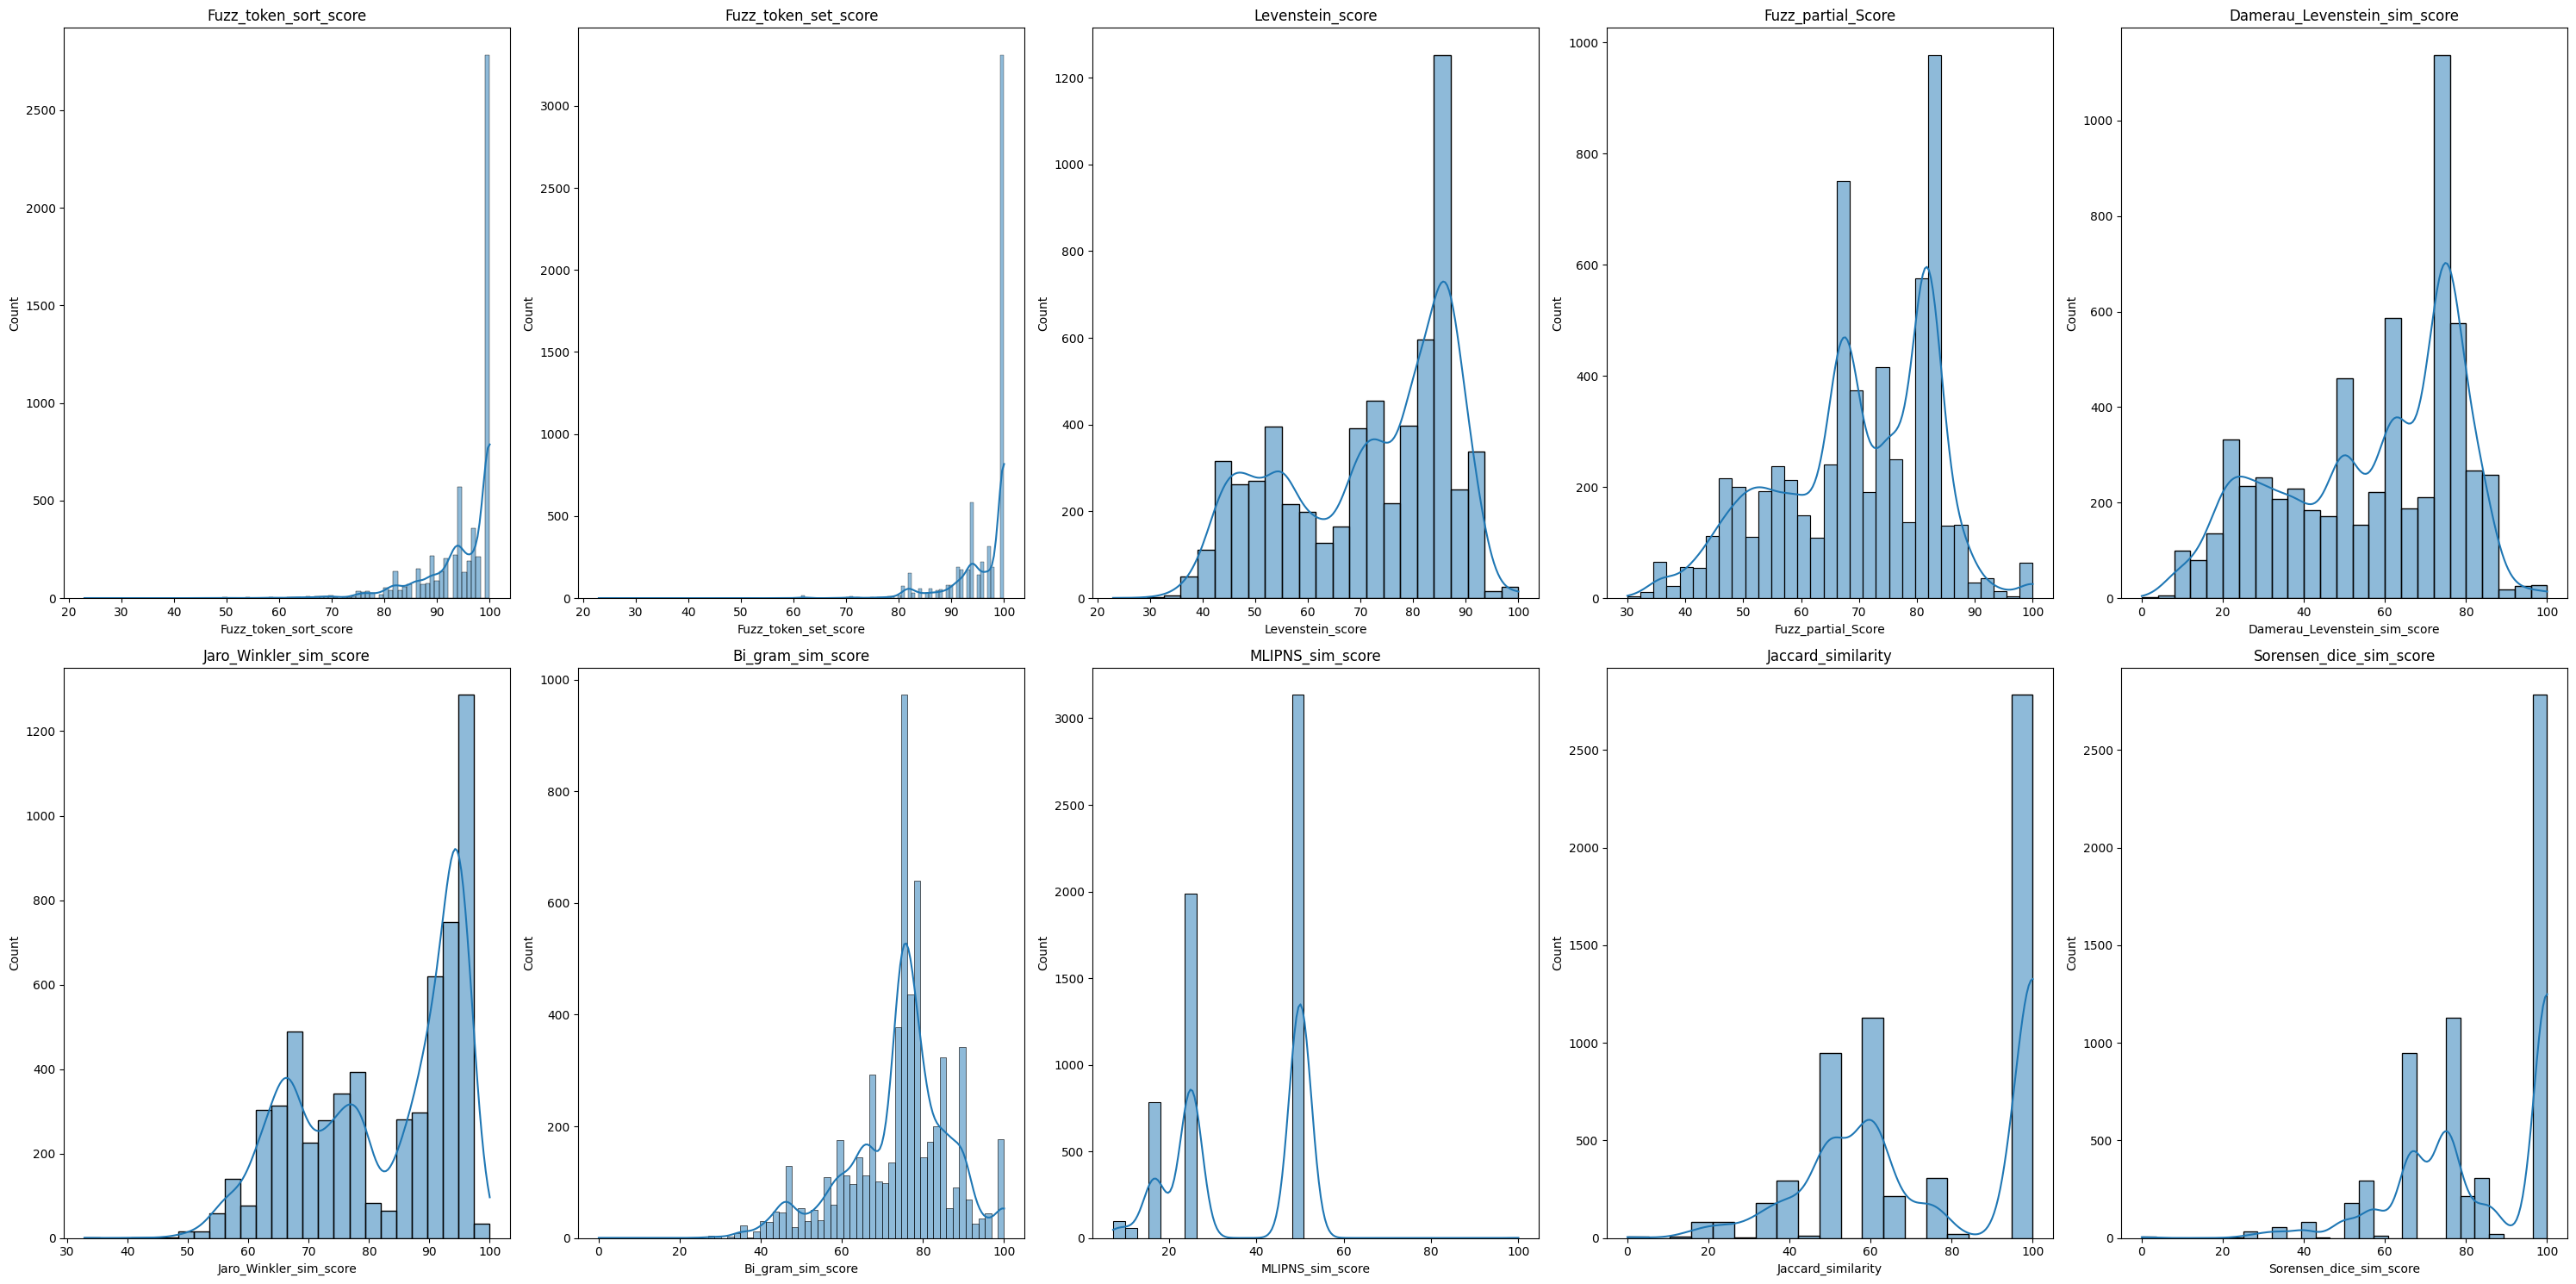

In [103]:
fig, axs = plt.subplots(2, 5, figsize=(30, 15))  # Increase the figure size

for i, col in enumerate(X.columns):
    if col != 'V_RESOLUTION':
        sns.histplot(new_FP_comm_val[col], kde=True, ax=axs[i // 5, i % 5])
        axs[i // 5, i % 5].set_title(col)

plt.tight_layout()
plt.show()

In [104]:
new_FP_comm_val[['Damerau_Levenstein_sim_score', 'Bi_gram_sim_score']].describe()

,Damerau_Levenstein_sim_score,Bi_gram_sim_score
count,6064.000000,6064.000000
mean,56.552958,73.990694
std,21.555259,12.692599
min,0.000000,0.000000
25%,38.460000,66.670000
50%,62.500000,75.000000
75%,75.000000,81.250000
max,100.000000,100.000000


In [105]:
new_FP_comm_val['Damerau_Levenstein_max_score'] = new_FP_comm_val[['Damerau_Levenstein_sim_score', 'Damerau_Levenstein_sim_score_A']].max(axis=1)
new_FP_comm_val['Bi_gram_max_score'] = new_FP_comm_val[['Bi_gram_sim_score', 'Bi_gram_sim_score_A']].max(axis=1)

filtered_df_TH['Damerau_Levenstein_max_score'] = filtered_df_TH[['Damerau_Levenstein_sim_score', 'Damerau_Levenstein_sim_score_A']].max(axis=1)
filtered_df_TH['Bi_gram_max_score'] = filtered_df_TH[['Bi_gram_sim_score', 'Bi_gram_sim_score_A']].max(axis=1)

#nov data
new_FP_comm_val_nov['Damerau_Levenstein_max_score'] = new_FP_comm_val_nov[['Damerau_Levenstein_sim_score', 'Damerau_Levenstein_sim_score_A']].max(axis=1)
new_FP_comm_val_nov['Bi_gram_max_score'] = new_FP_comm_val_nov[['Bi_gram_sim_score', 'Bi_gram_sim_score_A']].max(axis=1)

filtered_df_TH_nov['Damerau_Levenstein_max_score'] = filtered_df_TH_nov[['Damerau_Levenstein_sim_score', 'Damerau_Levenstein_sim_score_A']].max(axis=1)
filtered_df_TH_nov['Bi_gram_max_score'] = filtered_df_TH_nov[['Bi_gram_sim_score', 'Bi_gram_sim_score_A']].max(axis=1)

# for dec data
new_FP_comm_val_dec['Damerau_Levenstein_max_score'] = new_FP_comm_val_dec[['Damerau_Levenstein_sim_score', 'Damerau_Levenstein_sim_score_A']].max(axis=1)
new_FP_comm_val_dec['Bi_gram_max_score'] = new_FP_comm_val_dec[['Bi_gram_sim_score', 'Bi_gram_sim_score_A']].max(axis=1)

filtered_df_TH_dec['Damerau_Levenstein_max_score'] = filtered_df_TH_dec[['Damerau_Levenstein_sim_score', 'Damerau_Levenstein_sim_score_A']].max(axis=1)
filtered_df_TH_dec['Bi_gram_max_score'] = filtered_df_TH_dec[['Bi_gram_sim_score', 'Bi_gram_sim_score_A']].max(axis=1)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

### Finding threshold (mean) wih 70% of data suing comments where we have Mismatch Full legal name-Name structure and where we have match name present in the comments

In [106]:
new_FP_comm_val.shape

(6064, 36)

## 70-30 Split

In [107]:
X = new_FP_comm_val[['Damerau_Levenstein_max_score']]
y = new_FP_comm_val[['V_RESOLUTION']]

In [108]:
struc = new_FP_comm_val[['Damerau_Levenstein_max_score', 'Bi_gram_max_score' ,'V_RESOLUTION', 'V_COMMENTS', 'Out of Order', 'WL_NAMES', 'PARTY_NAMES']]

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


In [110]:
train_data, test_data = train_test_split(struc, test_size = 0.3, random_state=42, stratify = y)

In [111]:
train_data.shape

(4244, 7)

In [112]:
train_data.describe()

,Damerau_Levenstein_max_score,Bi_gram_max_score,V_RESOLUTION,Out of Order
count,4244.000000,4244.000000,4244.0,4244.000000
mean,56.572818,74.062333,0.0,1.161169
std,21.480178,12.565599,0.0,0.377221
min,0.000000,29.630000,0.0,0.000000
25%,38.460000,66.670000,0.0,1.000000
50%,62.500000,75.000000,0.0,1.000000
75%,75.000000,81.250000,0.0,1.000000
max,100.000000,100.000000,0.0,2.000000


In [113]:
train_data['V_RESOLUTION'].value_counts()

0    4244
Name: V_RESOLUTION, dtype: int64

In [114]:
test_data.shape

(1820, 7)

In [115]:
struc_all = pd.concat([new_FP_comm_val, filtered_df_TH])
struc_all_nov = pd.concat([new_FP_comm_val_nov, filtered_df_TH_nov])
struc_all_dec = pd.concat([new_FP_comm_val_dec, filtered_df_TH_dec])


In [116]:
struc_all.shape

(36957, 36)

In [117]:
X = struc_all[['Damerau_Levenstein_max_score']]
y = struc_all[['V_RESOLUTION']]

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


train_data, test_data = train_test_split(struc_all, test_size = 0.3, random_state=42, stratify = y)

In [119]:
train_data.shape

(25869, 36)

In [120]:
train_data.shape

(25869, 36)

In [121]:
test_data.shape

(11088, 36)

In [122]:
import matplotlib.pyplot as plt

3218
2461
1936
872
Best Threshold: 75.0, Min Error: 872


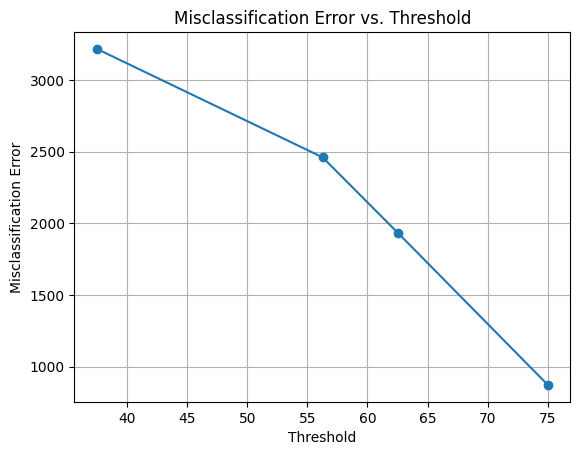

In [123]:
thresholds = [37.50, 56.265, 62.5, 75.0]

# 37.50 - 25 %
# 56.265 - mean
# 62.5 - 50 %
# 75.0 - 75 %

best_threshold = None
min_error = float('inf')
errors = []

for threshold in thresholds:
    # Make predictions based on the threshold
    predictions = (train_data['Damerau_Levenstein_max_score'] > threshold).astype(int)
    
    # Calculate misclassification error
    error = ((predictions != train_data['V_RESOLUTION']).sum())#/(len(test_data['V_RESOLUTION']))
    errors.append(error)
    print(error)
    
    # Update best threshold if error is lower
    if error < min_error:
        min_error = error
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}, Min Error: {min_error}")

# Plot the graph
plt.plot(thresholds, errors, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. Threshold')
plt.grid(True)
plt.show()


1385
1061
842
378
Best Threshold: 75.0, Min Error: 378


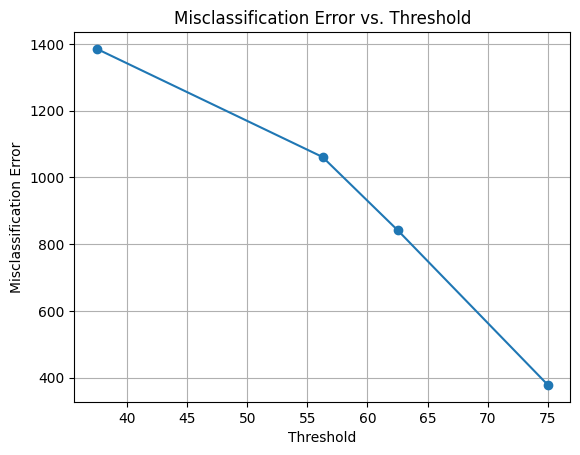

In [124]:
thresholds = [37.50, 56.265, 62.5, 75.0]

# 37.50 - 25 %
# 56.265 - mean
# 62.5 - 50 %
# 75.0 - 75 %

best_threshold = None
min_error = float('inf')
errors = []

for threshold in thresholds:
    # Make predictions based on the threshold
    predictions = (test_data['Damerau_Levenstein_max_score'] > threshold).astype(int)
    
    # Calculate misclassification error
    error = ((predictions != test_data['V_RESOLUTION']).sum())#/(len(test_data['V_RESOLUTION']))
    errors.append(error)
    print(error)
    
    # Update best threshold if error is lower
    if error < min_error:
        min_error = error
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}, Min Error: {min_error}")

# Plot the graph
plt.plot(thresholds, errors, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. Threshold')
plt.grid(True)
plt.show()


In [125]:
# number of entries where actually out of order components are present and score is < 75 (i.e. 75th percentile)
nss = test_data[(test_data['Damerau_Levenstein_max_score'] < 75) & (test_data['Out of Order'] == 1)]

In [126]:
nss4 = test_data[(test_data['Damerau_Levenstein_max_score'] < 75) & (test_data['Damerau_Levenstein_max_score'] >= 62.5) & (test_data['Out of Order'] == 1)]

In [127]:
'''struc_all = pd.concat([new_FP_comm_val, filtered_df_TH])
struc_all_nov = pd.concat([new_FP_comm_val_nov, filtered_df_TH_nov])
struc_all_dec = pd.concat([new_FP_comm_val_dec, filtered_df_TH_dec])'''


'struc_all = pd.concat([new_FP_comm_val, filtered_df_TH])\nstruc_all_nov = pd.concat([new_FP_comm_val_nov, filtered_df_TH_nov])\nstruc_all_dec = pd.concat([new_FP_comm_val_dec, filtered_df_TH_dec])'

In [128]:
struc_all.shape

(36957, 36)

In [129]:
struc_all.shape

(36957, 36)

In [130]:
'''threshold = 0.75

# Convert probabilities to binary predictions based on the threshold
y_pred = [1 if prob > 0.75 else 0 for prob in y_prob]

# Calculate F1 score
f1 = f1_score(y_train, y_pred)

# Print F1 score and confusion matrix
print(f"Threshold: {threshold}, F1 Score: {f1}")
conf_matrix = confusion_matrix(y_train, y_pred)
print(classification_report(y_train, y_pred))
print(" ")
print("Confusion Matrix:")
print(conf_matrix)
print()'''


'threshold = 0.75\n\n# Convert probabilities to binary predictions based on the threshold\ny_pred = [1 if prob > 0.75 else 0 for prob in y_prob]\n\n# Calculate F1 score\nf1 = f1_score(y_train, y_pred)\n\n# Print F1 score and confusion matrix\nprint(f"Threshold: {threshold}, F1 Score: {f1}")\nconf_matrix = confusion_matrix(y_train, y_pred)\nprint(classification_report(y_train, y_pred))\nprint(" ")\nprint("Confusion Matrix:")\nprint(conf_matrix)\nprint()'

In [131]:
'''X = struc_all['Damerau_Levenstein_max_score']
y = struc_all['V_RESOLUTION']


# Convert X to a DataFrame and then reshape it
X = pd.DataFrame(X)
X = X.values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)'''

"X = struc_all['Damerau_Levenstein_max_score']\ny = struc_all['V_RESOLUTION']\n\n\n# Convert X to a DataFrame and then reshape it\nX = pd.DataFrame(X)\nX = X.values.reshape(-1, 1)\n\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)"

In [132]:
X_train = train_data['Damerau_Levenstein_max_score']
X_test = test_data['Damerau_Levenstein_max_score']
y_train = train_data['V_RESOLUTION']
y_test = test_data['V_RESOLUTION']

In [133]:
from sklearn.metrics import classification_report

best_threshold = 75.0 

# Create predictions based on the best threshold
y_pred_train = (X_train > best_threshold).astype(int)

# Print the classification report
print(classification_report(y_train, y_pred_train))

conf_matrix = confusion_matrix(y_train, y_pred_train)

print(" ")
print("Confusion Matrix:")
print(conf_matrix)
print()

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      4245
           1       0.96      1.00      0.98     21624

    accuracy                           0.97     25869
   macro avg       0.98      0.90      0.93     25869
weighted avg       0.97      0.97      0.96     25869

 
Confusion Matrix:
[[ 3400   845]
 [   27 21597]]



In [134]:
# Create predictions based on the best threshold
y_pred = (X_test > best_threshold).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

print(" ")
print("Confusion Matrix:")
print(conf_matrix)
print()


              precision    recall  f1-score   support

           0       0.99      0.80      0.89      1819
           1       0.96      1.00      0.98      9269

    accuracy                           0.97     11088
   macro avg       0.98      0.90      0.93     11088
weighted avg       0.97      0.97      0.96     11088

 
Confusion Matrix:
[[1455  364]
 [  14 9255]]



## Testing for November data

In [135]:
X_nov = struc_all_nov['Damerau_Levenstein_max_score']
y_nov = struc_all_nov['V_RESOLUTION']


# Convert X to a DataFrame and then reshape it
X_nov = pd.DataFrame(X_nov)
X_nov = X_nov.values.reshape(-1, 1)

In [136]:
# Get predicted probabilities
best_threshold = 75.0  

# Create predictions based on the best threshold
y_test_nov = (X_nov > best_threshold).astype(int)
f1 = f1_score(y_nov, y_test_nov)



# Print F1 score and confusion matrix
print(f"Threshold: {best_threshold}, F1 Score: {f1}")
conf_matrix = confusion_matrix(y_nov, y_test_nov)
print(classification_report(y_nov, y_test_nov))
print(" ")
print("Confusion Matrix:")
print(conf_matrix)
print()

Threshold: 75.0, F1 Score: 0.9987096774193547
              precision    recall  f1-score   support

           0       0.99      0.89      0.94        74
           1       1.00      1.00      1.00      3484

    accuracy                           1.00      3558
   macro avg       0.99      0.95      0.97      3558
weighted avg       1.00      1.00      1.00      3558

 
Confusion Matrix:
[[  66    8]
 [   1 3483]]



## Testing for December data

In [137]:
X_dec = struc_all_dec['Damerau_Levenstein_max_score']
y_dec = struc_all_dec['V_RESOLUTION']


# Convert X to a DataFrame and then reshape it
X_dec = pd.DataFrame(X_dec)
X_dec = X_dec.values.reshape(-1, 1)

In [138]:
# Get predicted probabilities
best_threshold = 75.0  

# Create predictions based on the best threshold
y_test_dec = (X_dec > best_threshold).astype(int)
f1 = f1_score(y_dec, y_test_dec)



# Print F1 score and confusion matrix
print(f"Threshold: {best_threshold}, F1 Score: {f1}")
conf_matrix = confusion_matrix(y_dec, y_test_dec)
print(classification_report(y_dec, y_test_dec))
print(" ")
print("Confusion Matrix:")
print(conf_matrix)
print()

Threshold: 75.0, F1 Score: 0.9629629629629629
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.96      0.96      0.96        54

    accuracy                           0.94        64
   macro avg       0.88      0.88      0.88        64
weighted avg       0.94      0.94      0.94        64

 
Confusion Matrix:
[[ 8  2]
 [ 2 52]]



## Training classification model to get best threshold- For Name structure

### Performance on training data

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import numpy as np

In [140]:
X = struc_all['Damerau_Levenstein_max_score']
y = struc_all['V_RESOLUTION']


# Convert X to a DataFrame and then reshape it
X = pd.DataFrame(X)
X = X.values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Training a logistic regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)



LogisticRegression(class_weight='balanced')

### finding optimal threshold value by training a model

In [141]:
# Predicting probabilities for the train set
y_pred_prob = model.predict_proba(X_train)[:, 1]

In [142]:
# Finding the optimal threshold
thresholds = np.linspace(0, 1, 10000)
f1_scores = [f1_score(y_train, y_pred_prob > threshold) for threshold in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]

# Testing the performance using the best threshold
y_pred = (y_pred_prob > best_threshold).astype(int)
f1_score_best_threshold = f1_score(y_train, y_pred)

print(f'Best Threshold: {best_threshold}')
print(f'F1 Score at Best Threshold: {f1_score_best_threshold}')

Best Threshold: 0.6101610161016102
F1 Score at Best Threshold: 0.9978489649589453


In [143]:
np. unique(y_train, return_counts=True)

(array([0, 1]), array([ 4245, 21624]))

In [144]:
np. unique(y_test, return_counts=True)

(array([0, 1]), array([1819, 9269]))

In [145]:
# Convert X to a DataFrame and then reshape it
X_train = pd.DataFrame(X_train)
X_train = X_train.values.reshape(-1, 1)

### Result on 70% data- training

In [146]:
# Get predicted probabilities
y_prob = model.predict_proba(X_train)[:, 1]

threshold = 0.6101

# Convert probabilities to binary predictions based on the threshold
y_pred = [1 if prob > threshold else 0 for prob in y_prob]

# Calculate F1 score
f1 = f1_score(y_train, y_pred)

# Print F1 score and confusion matrix
print(f"Threshold: {threshold}, F1 Score: {f1}")
conf_matrix = confusion_matrix(y_train, y_pred)
print(classification_report(y_train, y_pred))
print(" ")
print("Confusion Matrix:")
print(conf_matrix)
print()

   
#print(f"Best Threshold: {best_threshold}, Best F1 Score: {best_f1}")


Threshold: 0.6101, F1 Score: 0.9978028077803733
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4245
           1       1.00      1.00      1.00     21624

    accuracy                           1.00     25869
   macro avg       0.99      0.99      0.99     25869
weighted avg       1.00      1.00      1.00     25869

 
Confusion Matrix:
[[ 4203    42]
 [   53 21571]]



### Result on 30% data

In [147]:
# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

threshold =0.6101

# Convert probabilities to binary predictions based on the threshold
y_pred = [1 if prob > threshold else 0 for prob in y_prob]

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print F1 score and confusion matrix
print(f"Threshold: {threshold}, F1 Score: {f1}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(" ")
print("Confusion Matrix:")
print(conf_matrix)
print()

   
#print(f"Best Threshold: {best_threshold}, Best F1 Score: {best_f1}")


Threshold: 0.6101, F1 Score: 0.9978958726733208
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1819
           1       1.00      1.00      1.00      9269

    accuracy                           1.00     11088
   macro avg       0.99      0.99      0.99     11088
weighted avg       1.00      1.00      1.00     11088

 
Confusion Matrix:
[[1801   18]
 [  21 9248]]



In [148]:









# Predict probabilities for all values in X_train
y_pred_prob_train = model.predict_proba(X_train)[:, 1]

# Find the value in X_train closest to the best_threshold
value_for_best_threshold = X_train[np.argmin(np.abs(y_pred_prob_train - best_threshold))][0]
#value_for_best_threshold = X_train[][0]

print(f'Value in X_train for which the best_threshold is coming: {value_for_best_threshold}')


Value in X_train for which the best_threshold is coming: 91.3


In [149]:
pp = pd.DataFrame({'Score': [91.3]})

zz = pp['Score']

In [150]:
zz

0    91.3
Name: Score, dtype: float64

In [151]:
zz = zz.values.reshape(-1,1)


In [152]:
# Predict probabilities for all values in X_train
y_pred_prob_train = model.predict_proba(zz)[:, 1]
print(y_pred_prob_train)

[0.61014362]


## Testing for November data

In [153]:
X_nov = struc_all_nov['Damerau_Levenstein_max_score']
y_nov = struc_all_nov['V_RESOLUTION']


# Convert X to a DataFrame and then reshape it
X_nov = pd.DataFrame(X_nov)
X_nov = X_nov.values.reshape(-1, 1)


### checking performance on test data

In [154]:
# Get predicted probabilities
y_prob = model.predict_proba(X_nov)[:, 1]

threshold = 0.6101

# Convert probabilities to binary predictions based on the threshold
y_pred = [1 if prob > threshold else 0 for prob in y_prob]

# Calculate F1 score
f1 = f1_score(y_nov, y_pred)

# Print F1 score and confusion matrix
print(f"Threshold: {threshold}, F1 Score: {f1}")
conf_matrix = confusion_matrix(y_nov, y_pred)
print(classification_report(y_nov, y_pred))
print(" ")
print("Confusion Matrix:")
print(conf_matrix)
print()

   
#print(f"Best Threshold: {best_threshold}, Best F1 Score: {best_f1}")


Threshold: 0.6101, F1 Score: 0.9995692749461593
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      1.00      1.00      3484

    accuracy                           1.00      3558
   macro avg       0.98      1.00      0.99      3558
weighted avg       1.00      1.00      1.00      3558

 
Confusion Matrix:
[[  74    0]
 [   3 3481]]



## Testing for December data

In [155]:
X_dec = struc_all_dec['Damerau_Levenstein_max_score']
y_dec = struc_all_dec['V_RESOLUTION']


# Convert X to a DataFrame and then reshape it
X_dec = pd.DataFrame(X_dec)
X_dec = X_dec.values.reshape(-1, 1)


In [156]:
# Get predicted probabilities
y_prob = model.predict_proba(X_dec)[:, 1]

threshold = 0.6101

# Convert probabilities to binary predictions based on the threshold
y_pred = [1 if prob > threshold else 0 for prob in y_prob]

# Calculate F1 score
f1 = f1_score(y_dec, y_pred)

# Print F1 score and confusion matrix
print(f"Threshold: {threshold}, F1 Score: {f1}")
conf_matrix = confusion_matrix(y_dec, y_pred)
print(classification_report(y_dec, y_pred))
print(" ")
print("Confusion Matrix:")
print(conf_matrix)
print()

struc_all_dec['Predicted'] = y_pred

#print(f"Best Threshold: {best_threshold}, Best F1 Score: {best_f1}")


Threshold: 0.6101, F1 Score: 0.9719626168224299
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.98      0.96      0.97        54

    accuracy                           0.95        64
   macro avg       0.90      0.93      0.91        64
weighted avg       0.96      0.95      0.95        64

 
Confusion Matrix:
[[ 9  1]
 [ 2 52]]



### saving the model object for name structure

In [157]:
import os
import pickle


# Specify the folder path
folder_path = dataiku.Folder('Roumya_ns_stuff').get_path()

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Save the model to a file inside the folder
file_path = os.path.join(folder_path, 'logistic_regression_ns_model.pkl')
with open(file_path, 'wb') as file:
    pickle.dump(model, file)


In [158]:
misclassified_df = struc_all_dec[(struc_all_dec['V_RESOLUTION']) != (struc_all_dec['Predicted'])]

In [159]:
#misclassified_df[['WL_NAMES', 'PARTY_NAMES', 'V_COMMENTS', 'Damerau_Levenstein_sim_score', 'V_RESOLUTION']]

## Variation-2: Mismatch Full legal Name- Word count

In [160]:
patt_5=re.compile("Mismatch Full Legal Name_Word Count|Mismatch Full Legal Name_ Word Count|Mismatch Full Legal Name - Word count|Mismatch Full Legal Name-Word count",re.IGNORECASE)
#print(new[(new["V_COMMENTS"].str.contains(patt_3)) & (new["V_RESOLUTION"]=="FP")]["V_COMMENTS"].shape)

In [161]:
test2['V_COMMENTS'].value_counts()

Mismatch Full Legal Name                                                                                                                                                                                                                                                                                                                                                                                       157
Mismatch Full Legal Name                                                                                                                                                                                                                                                                                                                                                                                       150
Match Name, Gender, DOB, Nationality & ID Number_NRIC                                                                                                                                             

In [162]:
new_FP_comm_val_3=new[(new["V_COMMENTS"].str.contains(patt_5)) & (new["V_RESOLUTION"]==0)]
new_FP_comm_val_3_nov=test1[(test1["V_COMMENTS"].str.contains(patt_5)) & (test1["V_RESOLUTION"]==0)]
new_FP_comm_val_3_dec=test2[(test2["V_COMMENTS"].str.contains(patt_5)) & (test2["V_RESOLUTION"]==0)]

In [163]:
new_FP_comm_val_3_dec.shape

(3, 34)

In [164]:
new_FP_comm_val_3.shape

(352, 34)

In [165]:
new_FP_comm_val_3[['Damerau_Levenstein_sim_score', 'Bi_gram_sim_score']].describe()

,Damerau_Levenstein_sim_score,Bi_gram_sim_score
count,352.000000,352.000000
mean,70.445199,63.972301
std,18.819800,20.737256
min,18.180000,24.000000
25%,58.820000,45.000000
50%,68.750000,62.500000
75%,81.250000,78.950000
max,100.000000,100.000000


In [166]:
new_FP_comm_val_3[['V_COMMENTS','PARTY_NAMES','WL_NAMES', 'Out of Order', 'Bi_gram_sim_score']].sample(10)

,V_COMMENTS,PARTY_NAMES,WL_NAMES,Out of Order,Bi_gram_sim_score
103,Mismatch Full Legal Name_Word Count. Customer'...,MUHAMAD,MUHAMMAD SULTAN,2,42.86
4811,Mismatch Full Legal Name_Word Count\n,NGUYEN PHUC,PHUC NGUYEN,1,66.67
40909,Mismatch Full Legal Name_Word Count\nWatchpers...,ROSLAN BIN AWANG MAT,RUSLAN BIN TUAN MAT,1,45.45
35897,Mismatch Full Legal Name_Word Count,AZIZAH MOHAMED,AZIZAH MOHD YATIM,2,45.00
21503,Mismatch Full Legal Name_Word Count.,HASSAN BIN AHMAD,HASSAN AHMED,2,57.89
52787,Mismatch Full Legal Name_Word Count,ZARINA YUSUF,KARINA TUAN YUSOFF,2,40.00
53659,Mismatch Full Legal Name_ Word Count. As per e...,TAN PENG,PENG TAN,1,55.56
49382,Mismatch Full Legal Name_Word Count,ZARINA YUSOF,KARINA TUAN YUSOFF,2,55.56
20439,Mismatch Full Legal Name_Word Count,AZIZAH MOHAMAD,AZIZAH MOHD YATIM,2,45.00
33361,Mismatch Full Legal Name_Word Count. \nBased ...,ALI AKBAR,AKBAR ALI,1,100.00


In [167]:
new_FP_comm_val_3['Out of Order'].value_counts()

2    209
1    103
0     40
Name: Out of Order, dtype: int64

In [168]:
nn = new_FP_comm_val_3[new_FP_comm_val_3['Out of Order'] != 2]

In [169]:
nn.shape

(143, 34)

In [170]:
nn[['Damerau_Levenstein_sim_score', 'Bi_gram_sim_score']].describe()

,Damerau_Levenstein_sim_score,Bi_gram_sim_score
count,143.000000,143.000000
mean,82.020140,79.688112
std,19.437601,18.413937
min,18.180000,33.330000
25%,75.500000,69.230000
50%,83.330000,80.000000
75%,100.000000,100.000000
max,100.000000,100.000000


In [171]:
new_FP_comm_val_3[['Damerau_Levenstein_sim_score', 'Bi_gram_sim_score']].describe()

,Damerau_Levenstein_sim_score,Bi_gram_sim_score
count,352.000000,352.000000
mean,70.445199,63.972301
std,18.819800,20.737256
min,18.180000,24.000000
25%,58.820000,45.000000
50%,68.750000,62.500000
75%,81.250000,78.950000
max,100.000000,100.000000


In [172]:
selected_rows = new_FP_comm_val_3[new_FP_comm_val_3['Out of Order'] == 2].head()[['Out of Order','V_RESOLUTION', 'V_COMMENTS','WL_NAMES', 'PARTY_NAMES']]

selected_rows

,Out of Order,V_RESOLUTION,V_COMMENTS,WL_NAMES,PARTY_NAMES
103,2,0,Mismatch Full Legal Name_Word Count. Customer'...,MUHAMMAD SULTAN,MUHAMAD
783,2,0,Mismatch Full Legal Name_Word Count,AZIZAH MOHD YATIM,ANIZAH MOHAMMAD
1078,2,0,Mismatch Full Legal Name_Word Count.,SULEIMAN MOHAMED,MOHD BIN TENGKU SULAIMAN
1294,2,0,Mismatch full legal name_Word Count. Watch per...,RASIDAH AWANG ABDUL RAHMAN,RASHIDAH ABDUL RAHMAN
1318,2,0,Mismatch Full Legal Name_Word Count\n,WONG YAN BIN,WONG YAN


In [173]:
X2=new_FP_comm_val_3[['Fuzz_token_sort_score','Fuzz_token_set_score','Levenstein_score','Fuzz_partial_Score','Damerau_Levenstein_sim_score', 'Jaro_Winkler_sim_score','Bi_gram_sim_score','MLIPNS_sim_score', 'Jaccard_similarity', 'Sorensen_dice_sim_score']]


In [174]:
X2.shape

(352, 10)

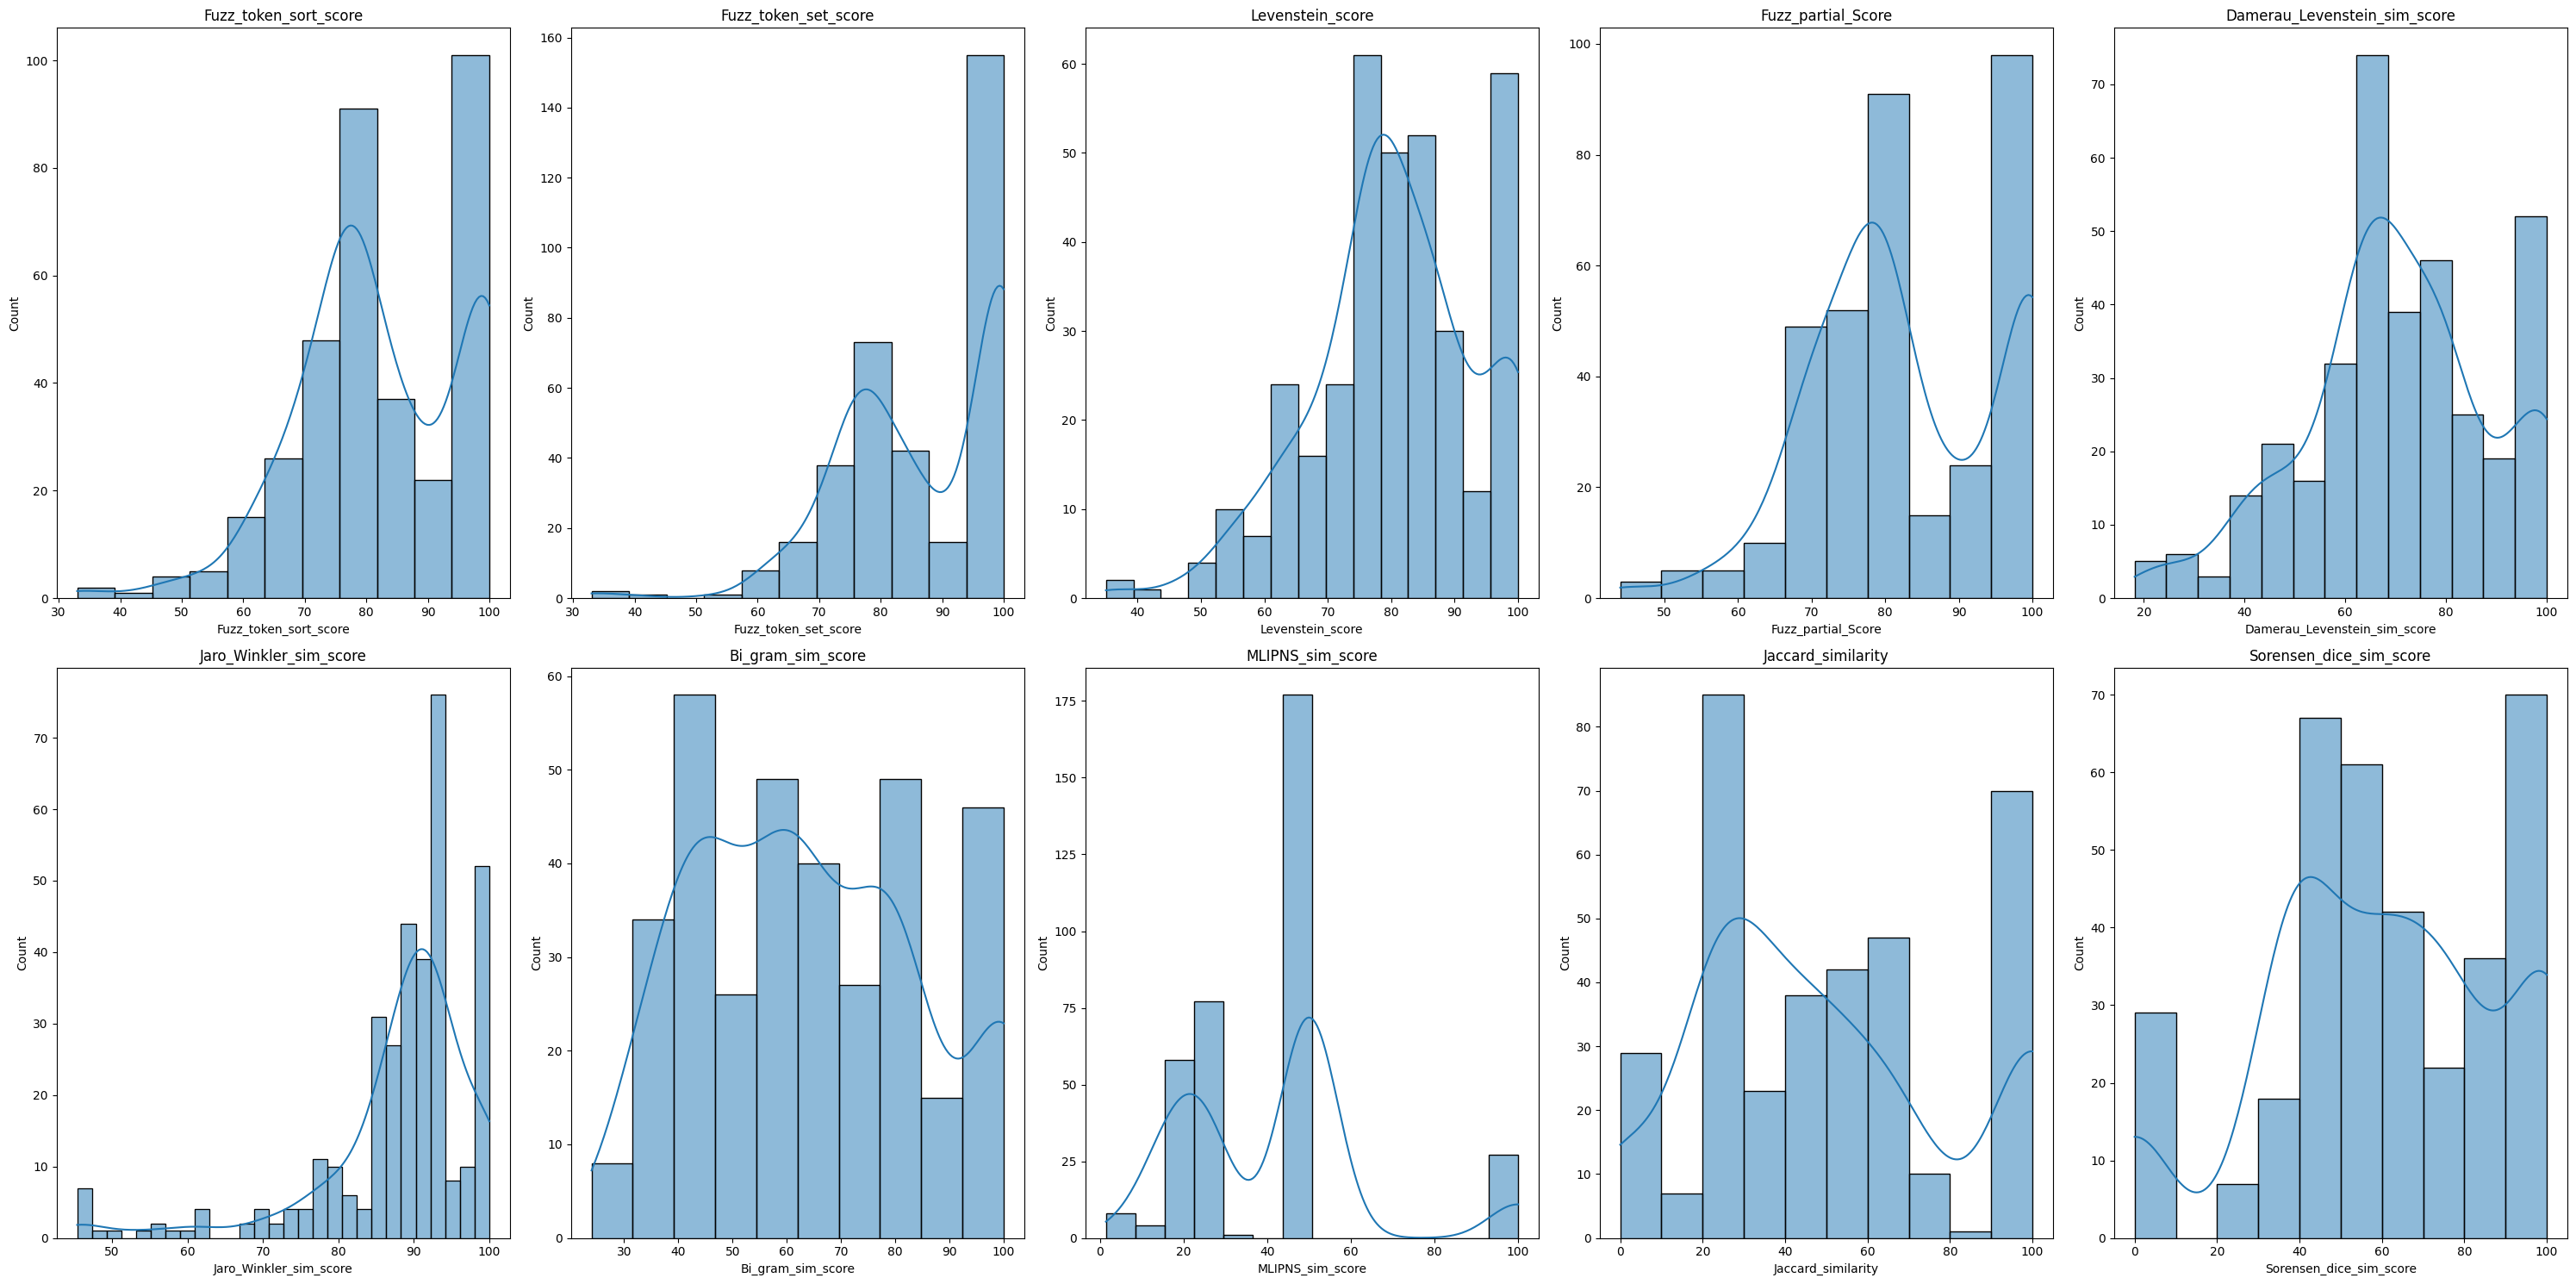

In [175]:
fig, axs = plt.subplots(2, 5, figsize=(30, 15))  # Increase the figure size

for i, col in enumerate(X2.columns):
    if col != 'V_RESOLUTION':
        sns.histplot(new_FP_comm_val_3[col], kde=True, ax=axs[i // 5, i % 5])
        axs[i // 5, i % 5].set_title(col)

plt.tight_layout()
plt.show()

In [176]:
# we choose bi_gram similarity score for word_count variation because of the data distribution

In [177]:
new_FP_comm_val_3['Damerau_Levenstein_max_score'] = new_FP_comm_val_3[['Damerau_Levenstein_sim_score', 'Damerau_Levenstein_sim_score_A']].max(axis=1)
new_FP_comm_val_3['Bi_gram_max_score'] = new_FP_comm_val_3[['Bi_gram_sim_score', 'Bi_gram_sim_score_A']].max(axis=1)

filtered_df_TH['Damerau_Levenstein_max_score'] = filtered_df_TH[['Damerau_Levenstein_sim_score', 'Damerau_Levenstein_sim_score_A']].max(axis=1)
filtered_df_TH['Bi_gram_max_score'] = filtered_df_TH[['Bi_gram_sim_score', 'Bi_gram_sim_score_A']].max(axis=1)


#for nov data
new_FP_comm_val_3_nov['Damerau_Levenstein_max_score'] = new_FP_comm_val_3_nov[['Damerau_Levenstein_sim_score', 'Damerau_Levenstein_sim_score_A']].max(axis=1)
new_FP_comm_val_3_nov['Bi_gram_max_score'] = new_FP_comm_val_3_nov[['Bi_gram_sim_score', 'Bi_gram_sim_score_A']].max(axis=1)

filtered_df_TH_nov['Damerau_Levenstein_max_score'] = filtered_df_TH_nov[['Damerau_Levenstein_sim_score', 'Damerau_Levenstein_sim_score_A']].max(axis=1)
filtered_df_TH_nov['Bi_gram_max_score'] = filtered_df_TH_nov[['Bi_gram_sim_score', 'Bi_gram_sim_score_A']].max(axis=1)


# for dec data
new_FP_comm_val_3_dec['Damerau_Levenstein_max_score'] = new_FP_comm_val_3_dec[['Damerau_Levenstein_sim_score', 'Damerau_Levenstein_sim_score_A']].max(axis=1)
new_FP_comm_val_3_dec['Bi_gram_max_score'] = new_FP_comm_val_3_dec[['Bi_gram_sim_score', 'Bi_gram_sim_score_A']].max(axis=1)

filtered_df_TH_dec['Damerau_Levenstein_max_score'] = filtered_df_TH_dec[['Damerau_Levenstein_sim_score', 'Damerau_Levenstein_sim_score_A']].max(axis=1)
filtered_df_TH_dec['Bi_gram_max_score'] = filtered_df_TH_dec[['Bi_gram_sim_score', 'Bi_gram_sim_score_A']].max(axis=1)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

### Finding threshold (mean) wih 70% of data using comments where we have Mismatch Full legal name- Word COUNT and where we have match name present in the comments

## 70-30 Split

In [178]:
X = new_FP_comm_val_3[['Bi_gram_max_score']]
y = new_FP_comm_val_3[['V_RESOLUTION']]



In [179]:
struc = new_FP_comm_val_3[['Bi_gram_max_score', 'Damerau_Levenstein_max_score', 'V_RESOLUTION', 'V_COMMENTS', 'Out of Order', 'WL_NAMES', 'PARTY_NAMES']]

In [180]:
new_FP_comm_val_3.shape

(352, 36)

In [181]:
filtered_df_TH.shape

(30893, 36)

In [182]:
struc_all = pd.concat([new_FP_comm_val_3, filtered_df_TH])
struc_all_nov_wc = pd.concat([new_FP_comm_val_3_nov, filtered_df_TH_nov])
struc_all_dec_wc = pd.concat([new_FP_comm_val_3_dec, filtered_df_TH_dec])

In [183]:
struc_all.shape

(31245, 36)

In [184]:
struc_all

,ALL_ALIAS_NAMES,ALL_PARTY_NAMES,ALL_WL_NAMES,V_COMMENTS,V_RESOLUTION,N_MATCH_SCORE,ALL_PARTY_NAMES_updated,ALL_WL_NAMES_updated,ALL_ALIAS_NAMES_updated,WL_NAMES,PARTY_NAMES,Fuzz_token_sort_score,Fuzz_token_set_score,WL_NAMES_A,PARTY_NAMES_A,Fuzz_token_sort_score_A,Fuzz_token_set_score_A,Levenstein_score,Fuzz_partial_Score,Levenstein_score_A,Fuzz_partial_Score_A,Damerau_Levenstein_sim_score,Damerau_Levenstein_sim_score_A,Jaccard_similarity,Jaccard_similarity_A,Jaro_Winkler_sim_score,Jaro_Winkler_sim_score_A,Bi_gram_sim_score,Bi_gram_sim_score_A,MLIPNS_sim_score,MLIPNS_sim_score_A,Sorensen_dice_sim_score,Sorensen_dice_sim_score_A,Out of Order,Damerau_Levenstein_max_score,Bi_gram_max_score
103,"[, , , , , , , , , , , , , , , ]","[MUHAMAD, , , ]","[A MUH, , , , , , MUHAMMAD SULTAN]",Mismatch Full Legal Name_Word Count. Customer'...,0,100.0,[MUHAMAD],"[A MUH, MUHAMMAD SULTAN]",[N],MUHAMMAD SULTAN,MUHAMAD,64,64,MUHAMMAD SULTAN,N,0,0,64,86,0,0,46.67,0.0,0.00,0.0,89.33,0.0,42.86,0.0,25.00,0.0,0.0,0.0,2,46.67,42.86
249,"[, , , , , , , , , , , , , , , ]","[SANJAY KUMAR, , , ]","[KUMAR SANJAY, , , , , , SANJAY KUMAR SINGH]",Mismatch Full Legal Name_Word Count,0,100.0,[SANJAY KUMAR],"[KUMAR SANJAY, SANJAY KUMAR SINGH]",[N],KUMAR SANJAY,SANJAY KUMAR,100,100,SANJAY KUMAR SINGH,N,0,0,80,100,0,0,66.67,0.0,100.00,0.0,93.33,0.0,69.23,0.0,25.00,0.0,100.0,0.0,1,66.67,69.23
452,"[, , , , , , , , , , , , , , , ]","[ROSLAN BIN NIK MAT, , , ]","[MAT TUAN RUSLAN, , , , , , RUSLAN BIN TUAN MAT]",Mismatch Full Legal Name_Word Count,0,90.0,[ROSLAN BIN NIK MAT],"[MAT TUAN RUSLAN, RUSLAN BIN TUAN MAT]",[N],RUSLAN BIN TUAN MAT,ROSLAN BIN NIK MAT,70,70,RUSLAN BIN TUAN MAT,N,0,0,81,78,0,0,73.68,0.0,33.33,0.0,84.68,0.0,47.62,0.0,25.00,0.0,50.0,0.0,1,73.68,47.62
783,"[, , , , , , , , , , , , , , , ]","[ANIZAH MOHAMMAD, , , ]","[, , , , , , AZIZAH MOHD YATIM]",Mismatch Full Legal Name_Word Count,0,91.0,[ANIZAH MOHAMMAD],[AZIZAH MOHD YATIM],[N],AZIZAH MOHD YATIM,ANIZAH MOHAMMAD,69,69,AZIZAH MOHD YATIM,N,0,0,69,67,0,0,58.82,0.0,0.00,0.0,80.18,0.0,30.43,0.0,50.00,0.0,0.0,0.0,2,58.82,30.43
859,"[, , , , , , , , , , , , , , , ]","[MOHD ARIFFIN BIN ISMAIL, , , ]","[ISMAIL ARIFIN BIN, ISMAIL MOHD ARIFIN BIN, ,...",Mismatch Full Legal Name_Word Count. Customer'...,0,95.0,[MOHD ARIFFIN BIN ISMAIL],"[ISMAIL ARIFIN BIN, ISMAIL MOHD ARIFIN BIN, M...",[N],ISMAIL MOHD ARIFIN BIN,MOHD ARIFFIN BIN ISMAIL,98,98,MOHD ARIFIN AWANG ISMAIL,N,0,0,85,83,0,0,79.17,0.0,60.00,0.0,93.06,0.0,78.26,0.0,16.67,0.0,75.0,0.0,1,79.17,78.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795582,"[, , , , , , , , , , , , , , , ]","[KON KIM SOON, , , ]","[, , , , , , KON KIM SOON]","Match Name, Gender, ID number_NRIC and Nationa...",1,100.0,[KON KIM SOON],[KON KIM SOON],[N],KON KIM SOON,KON KIM SOON,100,100,KON KIM SOON,N,0,0,100,100,0,0,100.00,0.0,100.00,0.0,100.00,0.0,100.00,0.0,100.00,0.0,100.0,0.0,0,100.00,100.00
795744,"[, , , , , , , , , , , , , , , ]","[MOHD AMMAR IMRAN BIN MOHD FAZLY, , , ]","[, , , , , , MOHD AMMAR IMRAN BIN MOHD FAZLY]",Match Name NRIC DOB and Nationality.\n,1,100.0,[MOHD AMMAR IMRAN BIN MOHD FAZLY],[MOHD AMMAR IMRAN BIN MOHD FAZLY],[N],MOHD AMMAR IMRAN BIN MOHD FAZLY,MOHD AMMAR IMRAN BIN MOHD FAZLY,100,100,MOHD AMMAR IMRAN BIN MOHD FAZLY,N,0,0,100,100,0,0,100.00,0.0,100.00,0.0,100.00,0.0,100.00,0.0,100.00,0.0,100.0,0.0,0,100.00,100.00
796164,"[, , , , , , , , , , , , , , , ]","[ZAFRAN HAFFIS BIN AYOB, , , ]","[, , , , , , ZAFRAN HAFFIS BIN AYOB]",Match Name NRIC DOB and Nationality.\n,1,100.0,[ZAFRAN HAFFIS BIN AYOB],[ZAFRAN HAFFIS BIN AYOB],[N],ZAFRAN HAFFIS BIN AYOB,ZAFRAN HAFFIS BIN AYOB,100,100,ZAFRAN HAFFIS BIN AYOB,N,0,0,100,100,0,0,100.00,0.0,100.00,0.0,100.00,0.0,100.00,0.0,100.00,0.0,100.0,0.0,0,100.00,100.00
796189,"[, , , , , , , , , , , , , , , ]","[MOHD NIZAM BIN MONSOR, , , ]","[, , , , , , MOHD NIZAM BIN MONSOR]",Match Name NRIC DOB and Nationality.\n,1,100

In [185]:
struc_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31245 entries, 103 to 796205
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ALL_ALIAS_NAMES                 31245 non-null  object 
 1   ALL_PARTY_NAMES                 31245 non-null  object 
 2   ALL_WL_NAMES                    31245 non-null  object 
 3   V_COMMENTS                      31245 non-null  object 
 4   V_RESOLUTION                    31245 non-null  int64  
 5   N_MATCH_SCORE                   31245 non-null  float64
 6   ALL_PARTY_NAMES_updated         31245 non-null  object 
 7   ALL_WL_NAMES_updated            31245 non-null  object 
 8   ALL_ALIAS_NAMES_updated         31245 non-null  object 
 9   WL_NAMES                        31245 non-null  object 
 10  PARTY_NAMES                     31245 non-null  object 
 11  Fuzz_token_sort_score           31245 non-null  int64  
 12  Fuzz_token_set_score         

In [186]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

X=struc_all['Bi_gram_max_score']
y = struc_all['V_RESOLUTION']

train_data, test_data = train_test_split(struc_all, test_size = 0.3, random_state=42,stratify=y)

In [187]:
train_data.shape

(21871, 36)

In [188]:
new_FP_comm_val_3[['Damerau_Levenstein_max_score', 'Bi_gram_max_score']].describe()

,Damerau_Levenstein_max_score,Bi_gram_max_score
count,352.000000,352.000000
mean,70.468892,63.972301
std,18.780783,20.737256
min,18.180000,24.000000
25%,58.820000,45.000000
50%,68.750000,62.500000
75%,81.250000,78.950000
max,100.000000,100.000000


In [189]:
np. unique(train_data['V_RESOLUTION'], return_counts=True)

(array([0, 1]), array([  246, 21625]))

In [190]:
train_data['V_RESOLUTION'].value_counts()

1    21625
0      246
Name: V_RESOLUTION, dtype: int64

In [191]:
test_data.shape

(9374, 36)

In [192]:
thresholds = [45.0, 62.5, 63.97, 78.965]

# 45.0 - 25 %
# 62.83 - 50 %
# 64.01 - mean
# 78.665 - 75 %

177
127
119
88
Best Threshold: 78.965, Min Error: 88


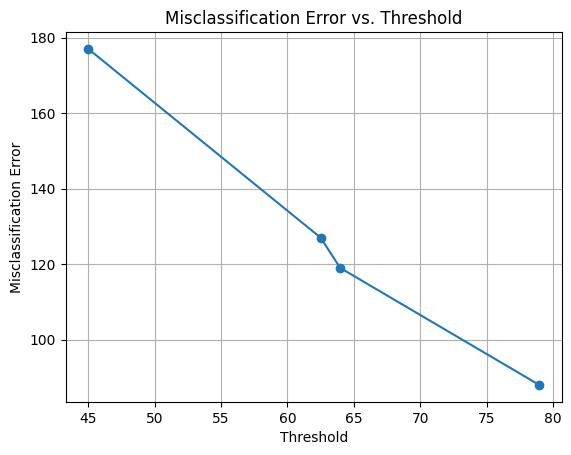

In [193]:
best_threshold = None
min_error = float('inf')
errors=[]

for threshold in thresholds:
    # Make predictions based on the threshold
    predictions = (train_data['Bi_gram_max_score'] > threshold).astype(int)
    
    # Calculate misclassification error
    error = ((predictions != train_data['V_RESOLUTION']).sum())#/(len(test_data['V_RESOLUTION']))
    errors.append(error)
    print(error)
    
    # Update best threshold if error is lower
    if error < min_error:
        min_error = error
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}, Min Error: {min_error}")

# Plot the graph
plt.plot(thresholds, errors, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. Threshold')
plt.grid(True)
plt.show()

79
53
51
43
Best Threshold: 78.965, Min Error: 43


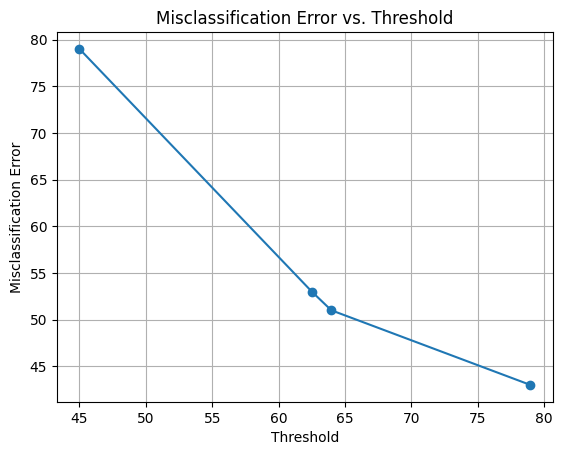

In [194]:
best_threshold = None
min_error = float('inf')
errors=[]

for threshold in thresholds:
    # Make predictions based on the threshold
    predictions = (test_data['Bi_gram_max_score'] > threshold).astype(int)
    
    # Calculate misclassification error
    error = ((predictions != test_data['V_RESOLUTION']).sum())#/(len(test_data['V_RESOLUTION']))
    errors.append(error)
    print(error)
    
    # Update best threshold if error is lower
    if error < min_error:
        min_error = error
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}, Min Error: {min_error}")

# Plot the graph
plt.plot(thresholds, errors, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. Threshold')
plt.grid(True)
plt.show()

In [195]:
struc_all.shape

(31245, 36)

In [196]:
X_train = train_data['Bi_gram_max_score']
X_test = test_data['Bi_gram_max_score']
y_train = train_data['V_RESOLUTION']
y_test = test_data['V_RESOLUTION']

In [197]:
from sklearn.metrics import classification_report

best_threshold = 78.665  

# Create predictions based on the best threshold
y_pred_train = (X_train > best_threshold).astype(int)

# Print the classification report
print(classification_report(y_train, y_pred_train))

conf_matrix = confusion_matrix(y_train, y_pred_train)

print(" ")
print("Confusion Matrix:")
print(conf_matrix)
print()

              precision    recall  f1-score   support

           0       0.85      0.76      0.81       246
           1       1.00      1.00      1.00     21625

    accuracy                           1.00     21871
   macro avg       0.92      0.88      0.90     21871
weighted avg       1.00      1.00      1.00     21871

 
Confusion Matrix:
[[  188    58]
 [   33 21592]]



In [198]:
# Create predictions based on the best threshold
y_pred = (X_test > best_threshold).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

print(" ")
print("Confusion Matrix:")
print(conf_matrix)
print()

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       106
           1       1.00      1.00      1.00      9268

    accuracy                           1.00      9374
   macro avg       0.92      0.85      0.88      9374
weighted avg       0.99      1.00      0.99      9374

 
Confusion Matrix:
[[  75   31]
 [  14 9254]]



## Testing for November data

In [199]:
X_nov = struc_all_nov_wc['Bi_gram_max_score']
y_nov = struc_all_nov_wc['V_RESOLUTION']


# Convert X to a DataFrame and then reshape it
X_nov = pd.DataFrame(X_nov)
X_nov = X_nov.values.reshape(-1, 1)

In [200]:
# Get predicted probabilities
best_threshold = 78.665  

# Create predictions based on the best threshold
y_test_nov = (X_nov > best_threshold).astype(int)
f1 = f1_score(y_nov, y_test_nov)

In [201]:
# Print F1 score and confusion matrix
print(f"Threshold: {best_threshold}, F1 Score: {f1}")
conf_matrix = confusion_matrix(y_nov, y_test_nov)
print(classification_report(y_nov, y_test_nov))
print(" ")
print("Confusion Matrix:")
print(conf_matrix)
print()

Threshold: 78.665, F1 Score: 0.9995696456749391
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       1.00      1.00      1.00      3484

    accuracy                           1.00      3491
   macro avg       1.00      0.79      0.86      3491
weighted avg       1.00      1.00      1.00      3491

 
Confusion Matrix:
[[   4    3]
 [   0 3484]]



## Testing for December data

In [202]:
X_dec = struc_all_dec_wc['Bi_gram_max_score']
y_dec = struc_all_dec_wc['V_RESOLUTION']


# Convert X to a DataFrame and then reshape it
X_dec = pd.DataFrame(X_dec)
X_dec = X_dec.values.reshape(-1, 1)

# Get predicted probabilities
best_threshold = 78.665  

# Create predictions based on the best threshold
y_test_dec = (X_dec > best_threshold).astype(int)
f1 = f1_score(y_dec, y_test_dec)

In [203]:
# Print F1 score and confusion matrix
print(f"Threshold: {best_threshold}, F1 Score: {f1}")
conf_matrix = confusion_matrix(y_dec, y_test_dec)
print(classification_report(y_dec, y_test_dec))
print(" ")
print("Confusion Matrix:")
print(conf_matrix)
print()

Threshold: 78.665, F1 Score: 0.9906542056074767
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.98      0.99        54

    accuracy                           0.98        57
   macro avg       0.88      0.99      0.92        57
weighted avg       0.99      0.98      0.98        57

 
Confusion Matrix:
[[ 3  0]
 [ 1 53]]



## Training classification model

### Performance on training data- For WORD COUNT

In [204]:
X = struc_all[['Bi_gram_max_score']]
y = struc_all['V_RESOLUTION']

In [205]:
# Convert X to a DataFrame and then reshape it
X = pd.DataFrame(X)
X = X.values.reshape(-1, 1)

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [207]:
np. unique(y_train, return_counts=True)

(array([0, 1]), array([  246, 21625]))

### Performance on training data - Word count

In [208]:
# Training a logistic regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [209]:
# Predicting probabilities for the test set
y_pred_prob = model.predict_proba(X_train)[:, 1]

### finding optimal threshold value by training a model

In [210]:
# Finding the optimal threshold
thresholds = np.linspace(0, 1, 10000)
f1_scores = [f1_score(y_train, y_pred_prob > threshold) for threshold in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]

# Testing the performance using the best threshold
y_pred = (y_pred_prob > best_threshold).astype(int)
f1_score_best_threshold = f1_score(y_train, y_pred)

print(f'Best Threshold: {best_threshold}')
print(f'F1 Score at Best Threshold: {f1_score_best_threshold}')

Best Threshold: 0.014301430143014302
F1 Score at Best Threshold: 0.9981041339128828


In [211]:
np. unique(y_train, return_counts=True)

(array([0, 1]), array([  246, 21625]))

In [212]:
np. unique(y_test, return_counts=True)

(array([0, 1]), array([ 106, 9268]))

In [213]:
# Convert X to a DataFrame and then reshape it
X_train = pd.DataFrame(X_train)
X_train = X_train.values.reshape(-1, 1)

### Result on 70% data- training

In [214]:
# Get predicted probabilities
y_prob = model.predict_proba(X_train)[:, 1]

threshold = 0.01

In [215]:
# Convert probabilities to binary predictions based on the threshold
y_pred = [1 if prob > threshold else 0 for prob in y_prob]

# Calculate F1 score
f1 = f1_score(y_train, y_pred)

# Print F1 score and confusion matrix
print(f"Threshold: {threshold}, F1 Score: {f1}")
conf_matrix = confusion_matrix(y_train, y_pred)
print(classification_report(y_train, y_pred))
print(" ")
print("Confusion Matrix:")
print(conf_matrix)
print()

Threshold: 0.01, F1 Score: 0.9980353634577603
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       246
           1       1.00      1.00      1.00     21625

    accuracy                           1.00     21871
   macro avg       0.92      0.90      0.91     21871
weighted avg       1.00      1.00      1.00     21871

 
Confusion Matrix:
[[  196    50]
 [   35 21590]]



### Result on 30% data

In [216]:
# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

threshold =0.01

# Convert probabilities to binary predictions based on the threshold
y_pred = [1 if prob > threshold else 0 for prob in y_prob]

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print F1 score and confusion matrix
print(f"Threshold: {threshold}, F1 Score: {f1}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(" ")
print("Confusion Matrix:")
print(conf_matrix)
print()

Threshold: 0.01, F1 Score: 0.9977889230437361
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       106
           1       1.00      1.00      1.00      9268

    accuracy                           1.00      9374
   macro avg       0.91      0.89      0.90      9374
weighted avg       1.00      1.00      1.00      9374

 
Confusion Matrix:
[[  82   24]
 [  17 9251]]



In [217]:
# Predict probabilities for all values in X_train
y_pred_prob_train = model.predict_proba(X_train)[:, 1]

# Find the value in X_train closest to the best_threshold
value_for_best_threshold = X_train[np.argmin(np.abs(y_pred_prob_train - best_threshold))][0]

print(f'Value in X_train for which the best_threshold is coming: {value_for_best_threshold}')

Value in X_train for which the best_threshold is coming: 81.82


In [218]:
pp = pd.DataFrame({'Score': [81.82]})

In [219]:
zz = pp['Score']

In [220]:
zz

0    81.82
Name: Score, dtype: float64

In [221]:
zz = zz.values.reshape(-1,1)

In [222]:
# Predict probabilities for all values in X_train
y_pred_prob_train = model.predict_proba(zz)[:, 1]
print(y_pred_prob_train)

[0.01423185]


## Testing for November data

In [223]:
X_nov = struc_all_nov_wc['Bi_gram_max_score']
y_nov = struc_all_nov_wc['V_RESOLUTION']


# Convert X to a DataFrame and then reshape it
X_nov = pd.DataFrame(X_nov)
X_nov = X_nov.values.reshape(-1, 1)

In [224]:
### checking performance on test data

In [225]:
# Get predicted probabilities
y_prob = model.predict_proba(X_nov)[:, 1]

threshold = 0.01

# Convert probabilities to binary predictions based on the threshold
y_pred = [1 if prob > threshold else 0 for prob in y_prob]

# Calculate F1 score
f1 = f1_score(y_nov, y_pred)

# Print F1 score and confusion matrix
print(f"Threshold: {threshold}, F1 Score: {f1}")
conf_matrix = confusion_matrix(y_nov, y_pred)
print(classification_report(y_nov, y_pred))
print(" ")
print("Confusion Matrix:")
print(conf_matrix)
print()

Threshold: 0.01, F1 Score: 0.9995696456749391
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       1.00      1.00      1.00      3484

    accuracy                           1.00      3491
   macro avg       1.00      0.79      0.86      3491
weighted avg       1.00      1.00      1.00      3491

 
Confusion Matrix:
[[   4    3]
 [   0 3484]]



In [226]:
struc_all_nov_wc.shape

(3491, 36)

In [227]:
struc_all_nov_wc['Misclassified'] = np.where(y_nov != y_pred, 1 ,0)
struc_all_nov_wc['Predicted'] = y_pred

In [228]:
struc_all_nov_wc.shape

(3491, 38)

In [229]:
misclassified = struc_all_nov_wc[struc_all_nov_wc['Misclassified'] == 1]

In [230]:
misclassified

,ALL_ALIAS_NAMES,ALL_PARTY_NAMES,ALL_WL_NAMES,V_COMMENTS,V_RESOLUTION,N_MATCH_SCORE,ALL_PARTY_NAMES_updated,ALL_WL_NAMES_updated,ALL_ALIAS_NAMES_updated,WL_NAMES,PARTY_NAMES,Fuzz_token_sort_score,Fuzz_token_set_score,WL_NAMES_A,PARTY_NAMES_A,Fuzz_token_sort_score_A,Fuzz_token_set_score_A,Levenstein_score,Fuzz_partial_Score,Levenstein_score_A,Fuzz_partial_Score_A,Damerau_Levenstein_sim_score,Damerau_Levenstein_sim_score_A,Jaccard_similarity,Jaccard_similarity_A,Jaro_Winkler_sim_score,Jaro_Winkler_sim_score_A,Bi_gram_sim_score,Bi_gram_sim_score_A,MLIPNS_sim_score,MLIPNS_sim_score_A,Sorensen_dice_sim_score,Sorensen_dice_sim_score_A,Out of Order,Damerau_Levenstein_max_score,Bi_gram_max_score,Misclassified,Predicted
885,[],[AUNG AUNG],"[AUNG AUNG, WIN NAING OO]",Mismatch Full Legal Name_Word Count,0,100.0,[AUNG AUNG],"[AUNG AUNG, WIN NAING OO]",[N],AUNG AUNG,AUNG AUNG,100,100,WIN NAING OO,N,0,0,100,100,0,0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,50.0,0.0,100.0,0.0,0,100.0,100.0,1,1
2167,[],[SHARMA PAWAN],"[PAWAN KUMAR SHARMA, SHARMA PAWAN]",Mismatch Full Legal Name_Word Count,0,100.0,[SHARMA PAWAN],"[PAWAN KUMAR SHARMA, SHARMA PAWAN]",[N],SHARMA PAWAN,SHARMA PAWAN,100,100,SHARMA PAWAN,N,0,0,100,100,0,0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,25.0,0.0,100.0,0.0,0,100.0,100.0,1,1
3300,[],[AUNG AUNG],"[AUNG AUNG, WIN NAING OO]",Mismatch Full Legal Name_Word Count,0,100.0,[AUNG AUNG],"[AUNG AUNG, WIN NAING OO]",[N],AUNG AUNG,AUNG AUNG,100,100,WIN NAING OO,N,0,0,100,100,0,0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,0.0,50.0,0.0,100.0,0.0,0,100.0,100.0,1,1


In [231]:
misclassified[['WL_NAMES', 'PARTY_NAMES', 'WL_NAMES_A', 'PARTY_NAMES_A','V_COMMENTS', 'Bi_gram_sim_score', 'Bi_gram_sim_score_A', 'Bi_gram_max_score', 'V_RESOLUTION', 'Predicted']]

,WL_NAMES,PARTY_NAMES,WL_NAMES_A,PARTY_NAMES_A,V_COMMENTS,Bi_gram_sim_score,Bi_gram_sim_score_A,Bi_gram_max_score,V_RESOLUTION,Predicted
885,AUNG AUNG,AUNG AUNG,WIN NAING OO,N,Mismatch Full Legal Name_Word Count,100.0,0.0,100.0,0,1
2167,SHARMA PAWAN,SHARMA PAWAN,SHARMA PAWAN,N,Mismatch Full Legal Name_Word Count,100.0,0.0,100.0,0,1
3300,AUNG AUNG,AUNG AUNG,WIN NAING OO,N,Mismatch Full Legal Name_Word Count,100.0,0.0,100.0,0,1


 
## Testing for December data

In [232]:
X_dec = struc_all_dec_wc['Bi_gram_sim_score']
y_dec = struc_all_dec_wc['V_RESOLUTION']


# Convert X to a DataFrame and then reshape it
X_dec = pd.DataFrame(X_dec)
X_dec = X_dec.values.reshape(-1, 1)

In [233]:
# Get predicted probabilities
y_prob = model.predict_proba(X_dec)[:, 1]

threshold = 0.01

# Convert probabilities to binary predictions based on the threshold
y_pred = [1 if prob > threshold else 0 for prob in y_prob]

# Calculate F1 score
f1 = f1_score(y_dec, y_pred)

# Print F1 score and confusion matrix
print(f"Threshold: {threshold}, F1 Score: {f1}")
conf_matrix = confusion_matrix(y_dec, y_pred)
print(classification_report(y_dec, y_pred))
print(" ")
print("Confusion Matrix:")
print(conf_matrix)
print()

#struc_all_dec['Predicted'] = y_pred

#print(f"Best Threshold: {best_threshold}, Best F1 Score: {best_f1}")

Threshold: 0.01, F1 Score: 0.9906542056074767
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.98      0.99        54

    accuracy                           0.98        57
   macro avg       0.88      0.99      0.92        57
weighted avg       0.99      0.98      0.98        57

 
Confusion Matrix:
[[ 3  0]
 [ 1 53]]



In [234]:
struc_all_dec_wc['Misclassified'] = np.where(y_dec != y_pred, 1 ,0)
struc_all_dec_wc['Predicted'] = y_pred



In [235]:
misclassified = struc_all_dec_wc[struc_all_dec_wc['Misclassified'] == 1]

In [236]:
#misclassified[['WL_NAMES', 'PARTY_NAMES', 'WL_NAMES_A', 'PARTY_NAMES_A','V_COMMENTS', 'Bi_gram_sim_score', 'Bi_gram_sim_score_A', 'Bi_gram_max_score', 'V_RESOLUTION', 'Predicted']]

### Saving model object for word count variation

In [237]:
import os
import pickle


# Specify the folder path
folder_path = dataiku.Folder('Roumya_ns_stuff').get_path()

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Save the model to a file inside the folder
file_path = os.path.join(folder_path, 'logistic_regression_wc_model.pkl')
with open(file_path, 'wb') as file:
    pickle.dump(model, file)
